In [1]:
import pyreadr
import scanpy as sc
import numpy as np
import os
import pandas as pd
import anndata as ad
import scrublet as scr
from pathlib import Path

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
# where to save the file and filename to give
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc/")
scrublet_filename = "Pelka2021_CRC_scrublet.txt"

# figures path to save
FIG2SAVE = DIR2SAVE.joinpath("figures/")
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [3]:
adata = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/raw/Pelka2021_CRC_raw.h5ad"
)

In [4]:
set(adata.obs.Tissue)

{'CRC'}

In [5]:
set(adata.obs.Patient)

{'C103_T',
 'C104_T',
 'C105_T',
 'C106_T',
 'C107_T',
 'C109_T',
 'C110_T',
 'C111_T',
 'C112_T',
 'C113_T',
 'C114_T',
 'C115_T',
 'C116_T',
 'C118_T',
 'C119_T',
 'C122_T',
 'C123_T',
 'C124_T',
 'C125_T',
 'C126_T',
 'C129_T',
 'C130_TA',
 'C130_TB',
 'C132_T',
 'C133_T',
 'C134_T',
 'C135_T',
 'C136_T',
 'C137_T',
 'C138_T',
 'C139_T',
 'C140_T',
 'C142_T',
 'C143_T',
 'C144_T',
 'C145_T',
 'C146_T',
 'C147_T',
 'C149_T',
 'C150_T',
 'C151_T',
 'C152_T',
 'C153_T',
 'C154_T',
 'C155_T',
 'C156_T',
 'C157_T',
 'C158_T',
 'C159_T',
 'C160_T',
 'C161_T',
 'C162_T',
 'C163_T',
 'C164_T',
 'C165_T',
 'C166_T',
 'C167_T',
 'C168_T',
 'C169_T',
 'C170_T',
 'C171_TA',
 'C171_TB',
 'C172_T',
 'C173_T'}

In [6]:
len(set(adata.obs.Patient))

64

### run scrublet per sample and on raw data
* When working with data from multiple samples, run Scrublet on each sample separately. Because Scrublet is designed to detect technical doublets formed by the random co-encapsulation of two cells, it may perform poorly on merged datasets where the cell type proportions are not representative of any single sample.

In [7]:
adata.obs

SPECIMEN_TYPE SOURCE_HOSPITAL  \
cellID                                                                 
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC             T             MGH   
...                                              ...             ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA             T            DFCI   

                                       TISSUE_PROCESSING_TEAM PROCESSING_TYPE  \
cellID                                                                          
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC                Hacohen        unsorted   
...                                                       ...             ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA             CCPM_Regev        unsorted   

                                       SINGLECELL_TYPE Patient  \
cellID                                                           
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC          SC3Pv2  C103_T   
...                                                ...     ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA          SC3Pv3  C173_T   

                                       HistologicTypeSimple  \
cellID                                                        
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC       Adenocarcinoma   
...                                                     ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA       Adenocarcinoma   

                                                        MMR_IHC MMRStatus  \
cellID                                                                      
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                preserved      MMRp   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                preserved      MMRp   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                preserv

#### Check that the data is raw 

In [8]:
adata.X[1:5, 1:5]

<4x4 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Compressed Sparse Row format>

In [9]:
np.max(adata.X)

59020.0

#### run scrublet
scr.scrub_doublets() simulates doublets from the observed data and uses a k-nearest-neighbor classifier to calculate a continuous doublet_score (between 0 and 1) for each transcriptome. The score is automatically thresholded to generate predicted_doublets, a boolean array that is True for predicted doublets and False otherwise.

In [10]:
adata.obs

SPECIMEN_TYPE SOURCE_HOSPITAL  \
cellID                                                                 
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC             T             MGH   
...                                              ...             ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA             T            DFCI   

                                       TISSUE_PROCESSING_TEAM PROCESSING_TYPE  \
cellID                                                                          
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC                Hacohen        unsorted   
...                                                       ...             ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA             CCPM_Regev        unsorted   

                                       SINGLECELL_TYPE Patient  \
cellID                                                           
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC          SC3Pv2  C103_T   
...                                                ...     ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA          SC3Pv3  C173_T   

                                       HistologicTypeSimple  \
cellID                                                        
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC       Adenocarcinoma   
...                                                     ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA       Adenocarcinoma   

                                                        MMR_IHC MMRStatus  \
cellID                                                                      
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                preserved      MMRp   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                preserved      MMRp   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                preserv

In [11]:
def run_scrublet(adata, sample_col="Sample", cellbarcode_index_name="level_1"):
    # create dict that stores scrublet results from each sample in adata
    scrublet_dict = {k: None for k in list(set(adata.obs[sample_col]))}

    # run scrublet per sample
    for sample in scrublet_dict.keys():
        print("Sample:", sample)
        adata_tmp = adata[adata.obs[sample_col] == sample].copy()
        scrub = scr.Scrublet(adata_tmp.X)
        (
            adata_tmp.obs["doublet_score"],
            adata_tmp.obs["predicted_doublet"],
        ) = scrub.scrub_doublets()
        scrub.plot_histogram()
        # sc.external.pp.scrublet(adata_tmp)
        scrublet_dict[sample] = adata_tmp.obs[
            ["Sample", "doublet_score", "predicted_doublet"]
        ]
        # sc.external.pl.scrublet_score_distribution(adata_tmp)

    # Put all scores in a single panda dataframe
    scrublet_concat = (
        pd.concat(scrublet_dict, axis=0)
        .reset_index()
        .drop(labels="level_0", axis=1)
        .set_index(cellbarcode_index_name)
    )

    return scrublet_concat

In [12]:
adata.obs

SPECIMEN_TYPE SOURCE_HOSPITAL  \
cellID                                                                 
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT             T             MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC             T             MGH   
...                                              ...             ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT             T            DFCI   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA             T            DFCI   

                                       TISSUE_PROCESSING_TEAM PROCESSING_TYPE  \
cellID                                                                          
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT                Hacohen        unsorted   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC                Hacohen        unsorted   
...                                                       ...             ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT             CCPM_Regev        unsorted   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA             CCPM_Regev        unsorted   

                                       SINGLECELL_TYPE Patient  \
cellID                                                           
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT          SC3Pv2  C103_T   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC          SC3Pv2  C103_T   
...                                                ...     ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT          SC3Pv3  C173_T   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA          SC3Pv3  C173_T   

                                       HistologicTypeSimple  \
cellID                                                        
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT       Adenocarcinoma   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC       Adenocarcinoma   
...                                                     ...   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCATCGGGC       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGGAGTCTAGTGTG       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGCAGCAATTC       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGGTTCTGAGT       Adenocarcinoma   
C173_T_0_0_0_c1_v3_id-TTTGTTGTCGTTCCCA       Adenocarcinoma   

                                                        MMR_IHC MMRStatus  \
cellID                                                                      
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                preserved      MMRp   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                preserved      MMRp   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                preserv

Sample: C119_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 10.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.6%
Elapsed time: 2.6 seconds
Sample: C143_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 3.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.5%
Elapsed time: 2.2 seconds
Sample: C140_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Aut

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/scrublet/scrublet.py:485: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Sample: C114_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 7.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.0%
Elapsed time: 2.0 seconds
Sample: C138_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 0.7 seconds
Sample: C170_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Auto

Sample: C161_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 28.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.8%
Elapsed time: 3.2 seconds
Sample: C122_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 9.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.4%
Elapsed time: 2.0 seconds
Sample: C150_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Aut

Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 12.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.8%
Elapsed time: 2.9 seconds
Sample: C155_T
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Could not find library "annoy" for approx. nearest neighbor search
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 3.2 seconds


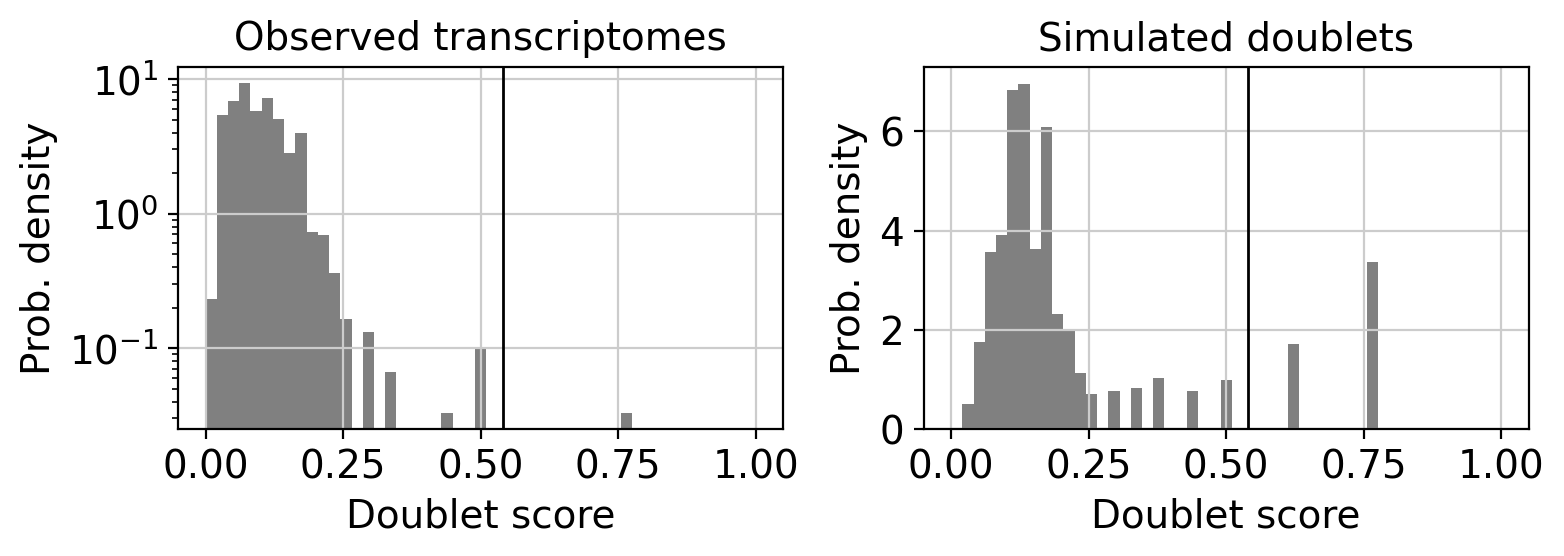

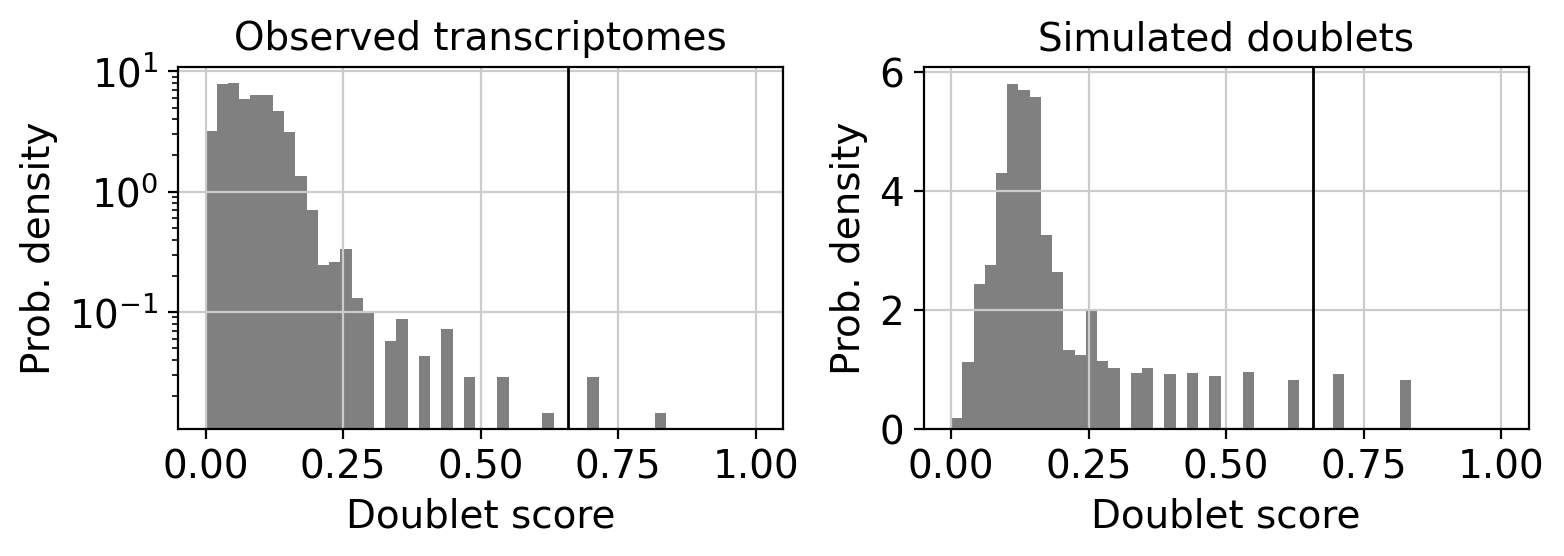

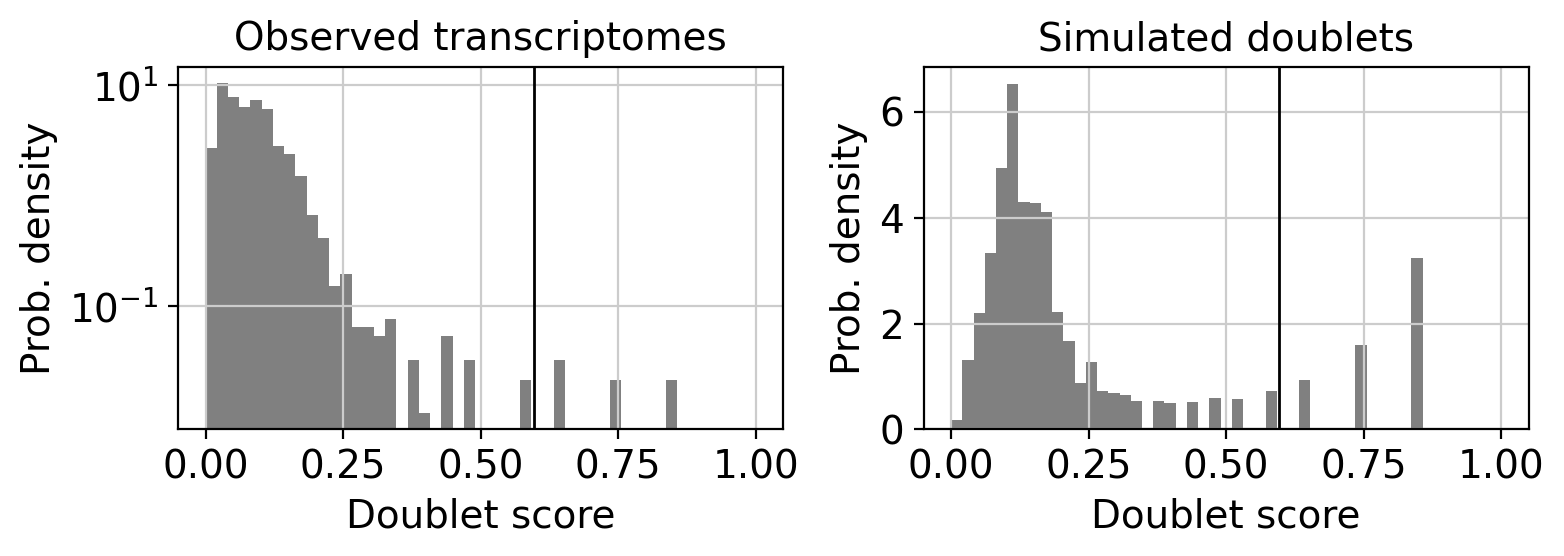

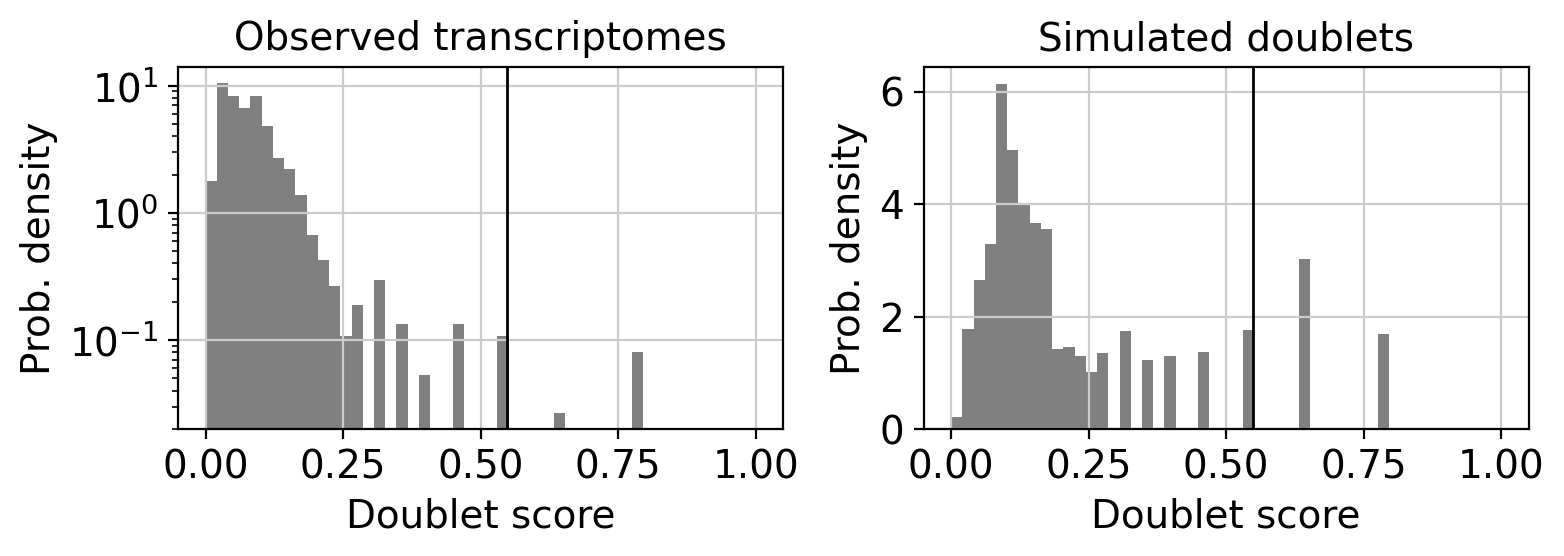

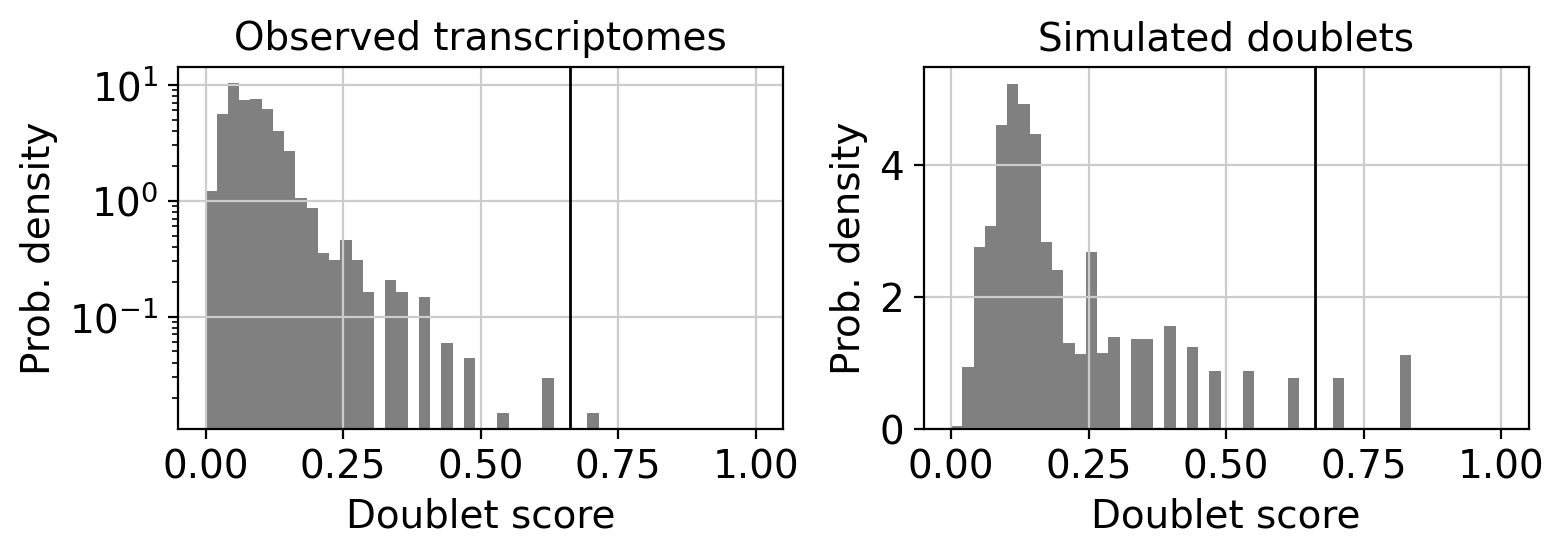

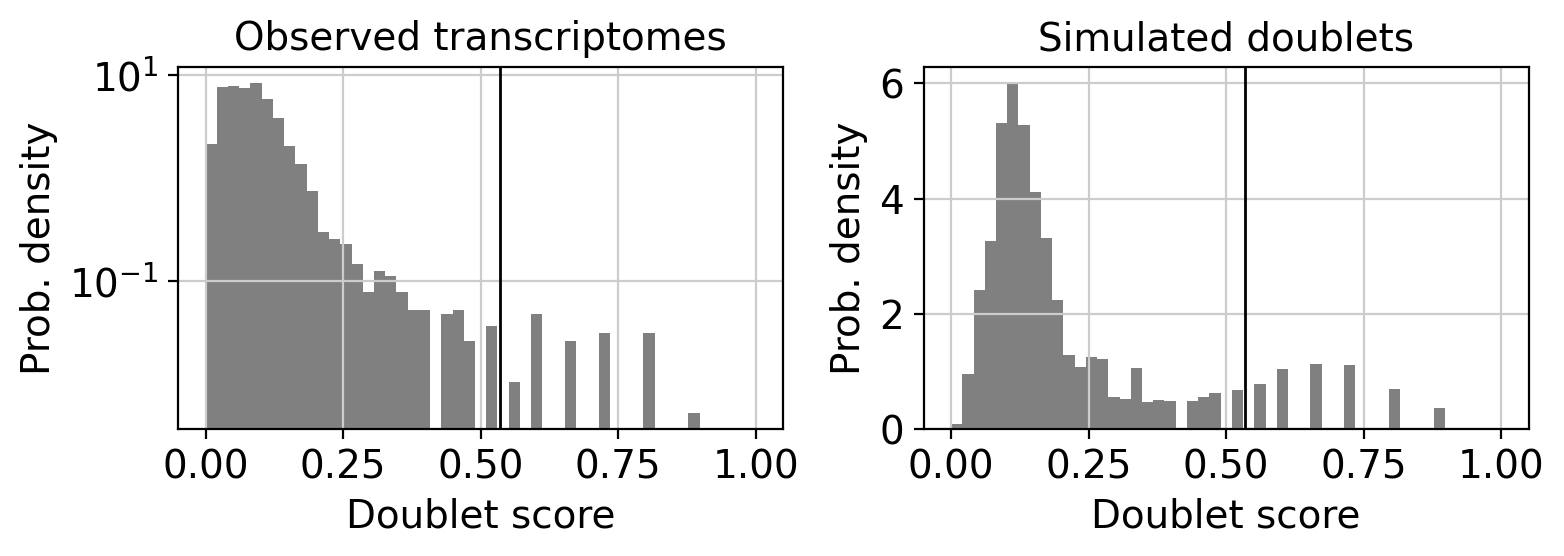

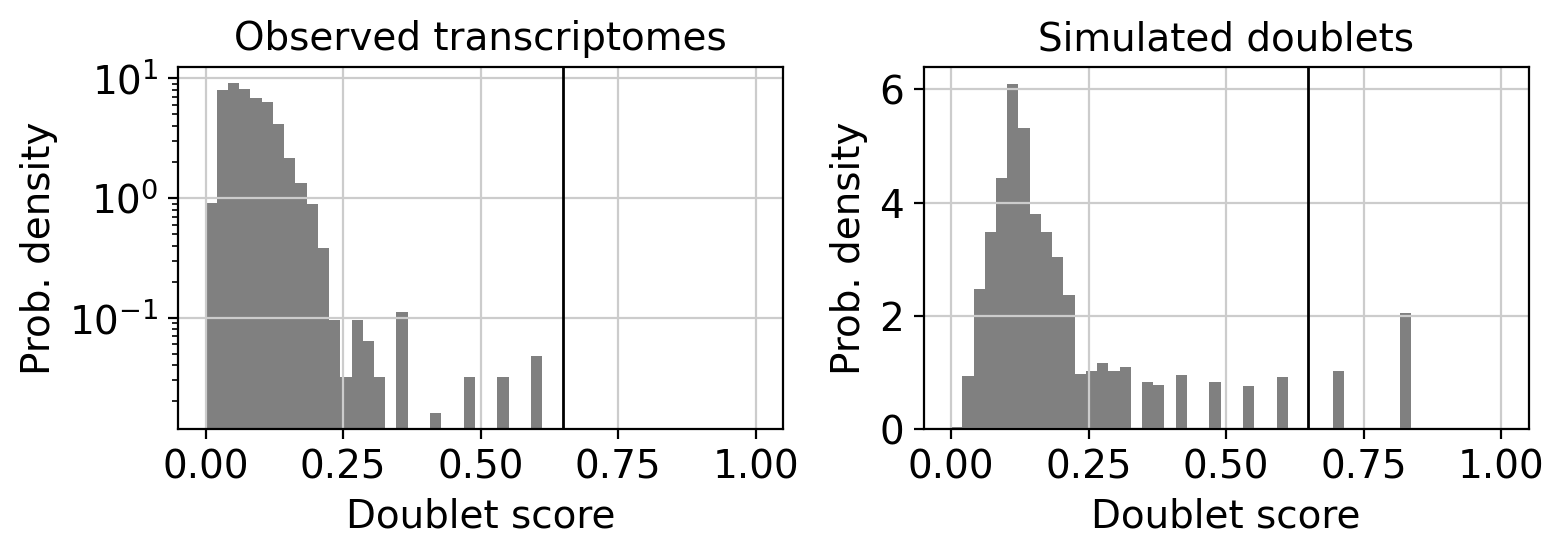

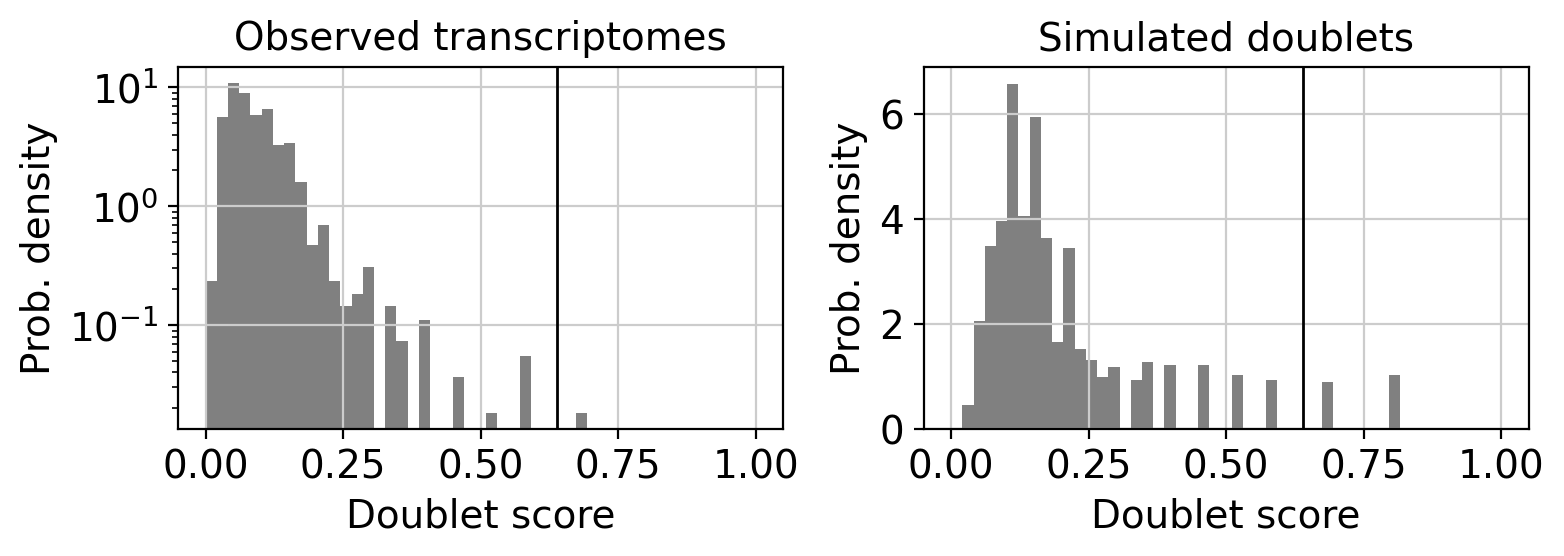

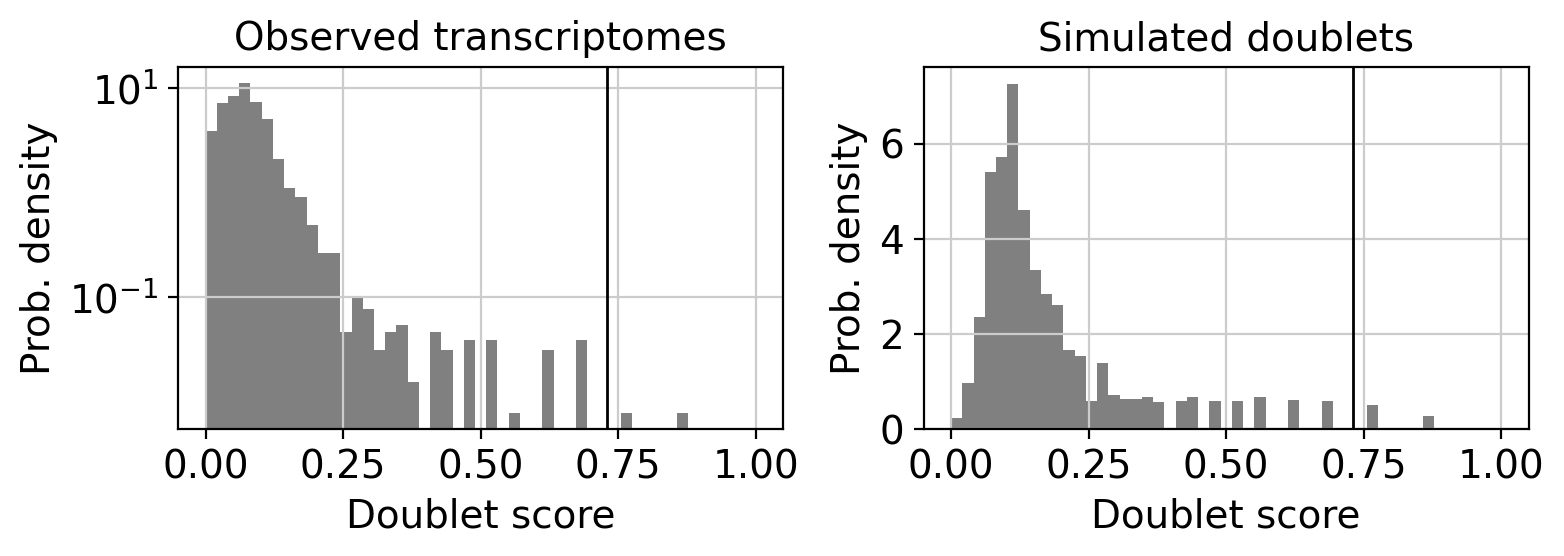

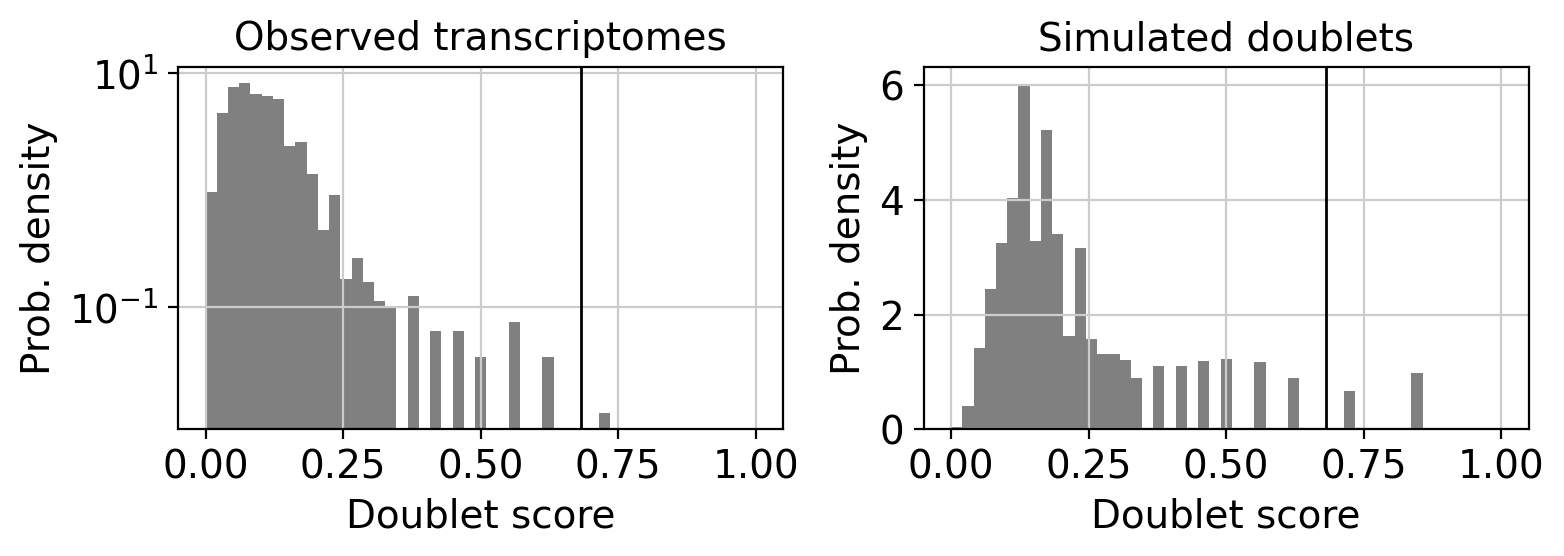

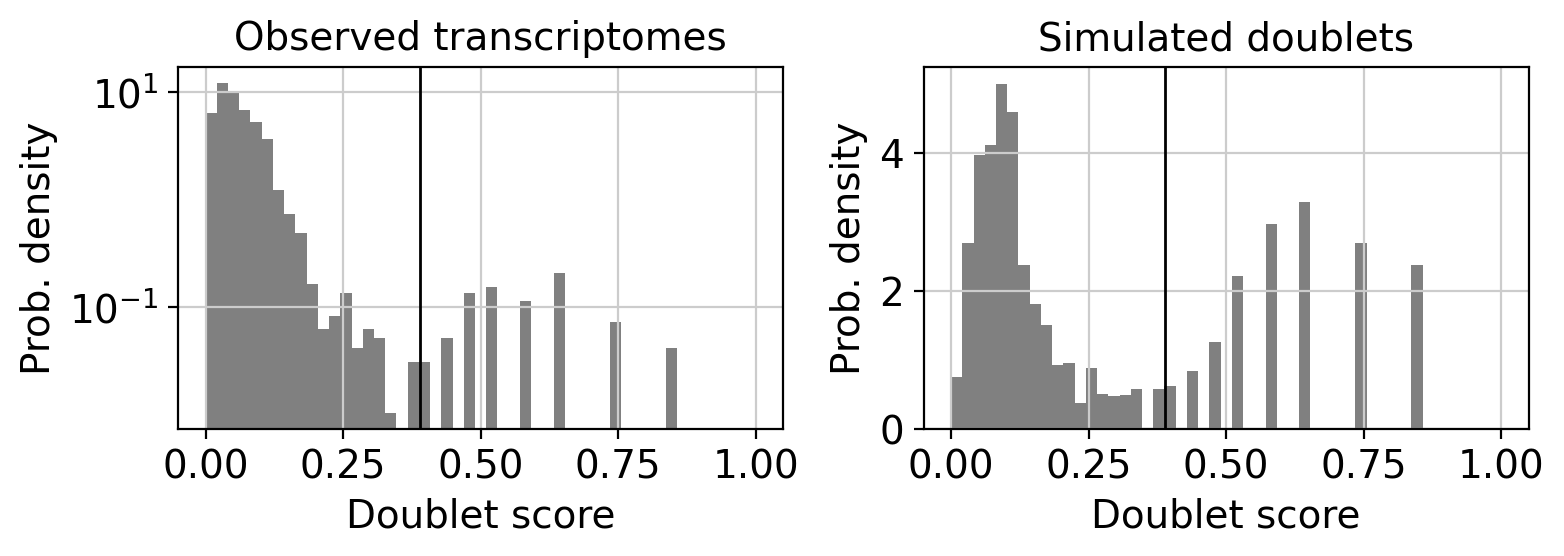

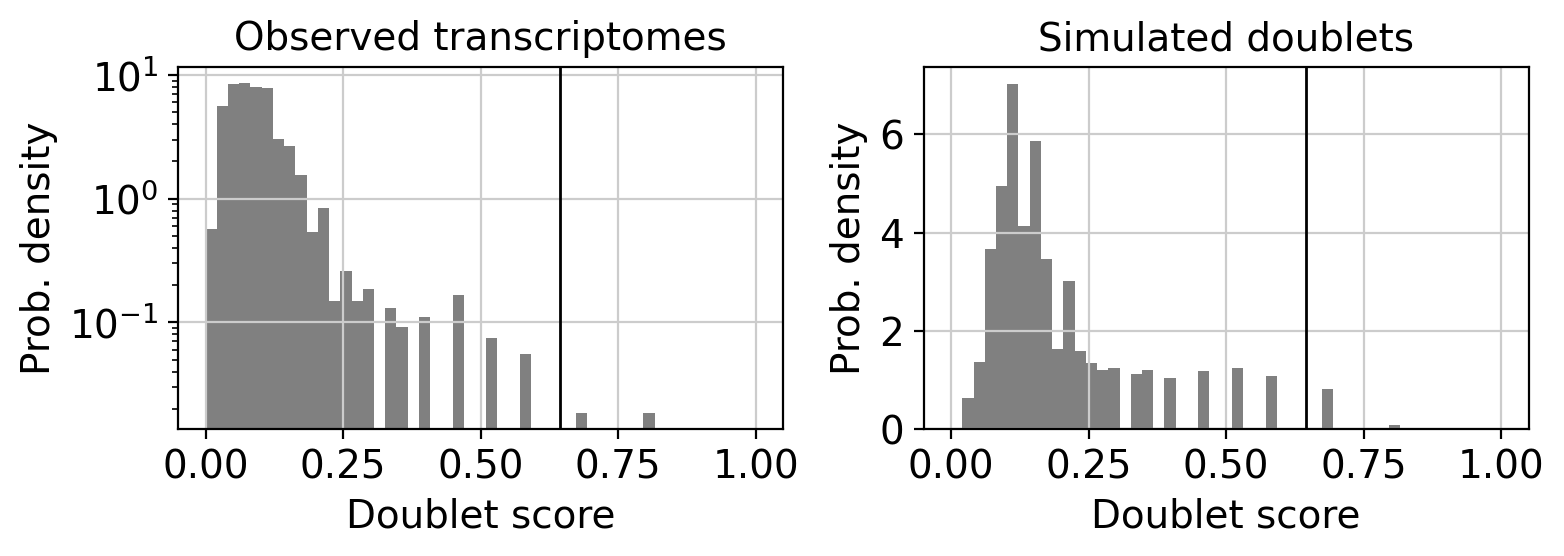

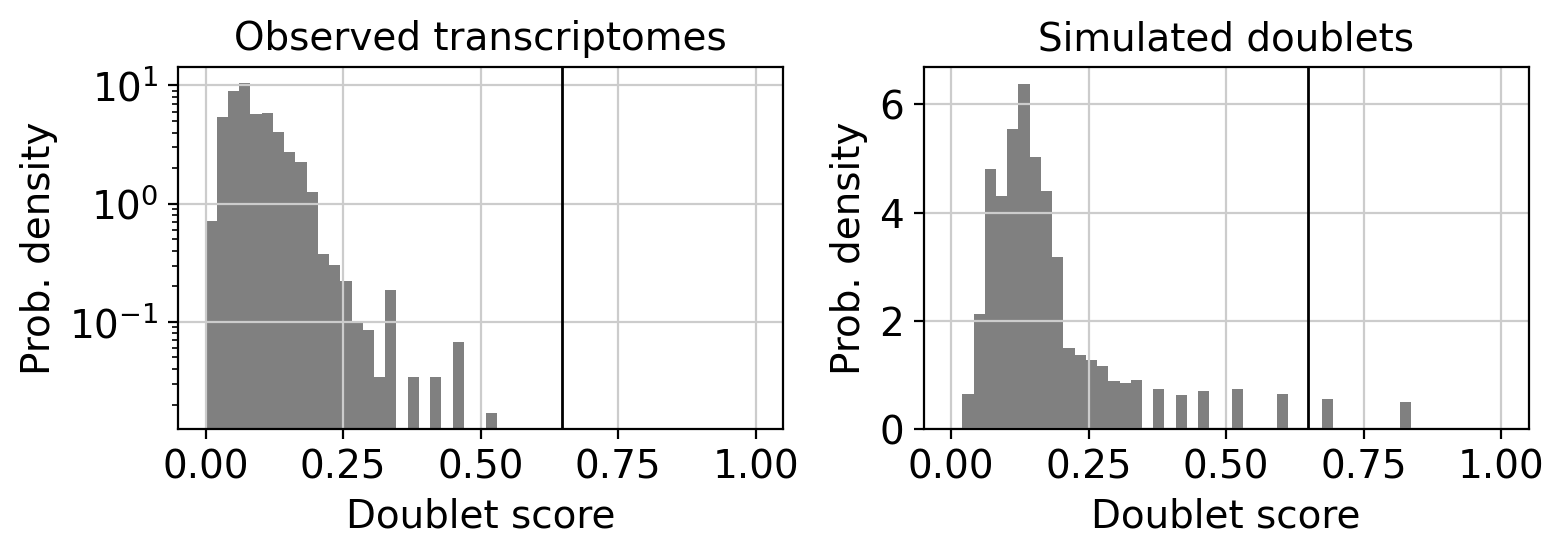

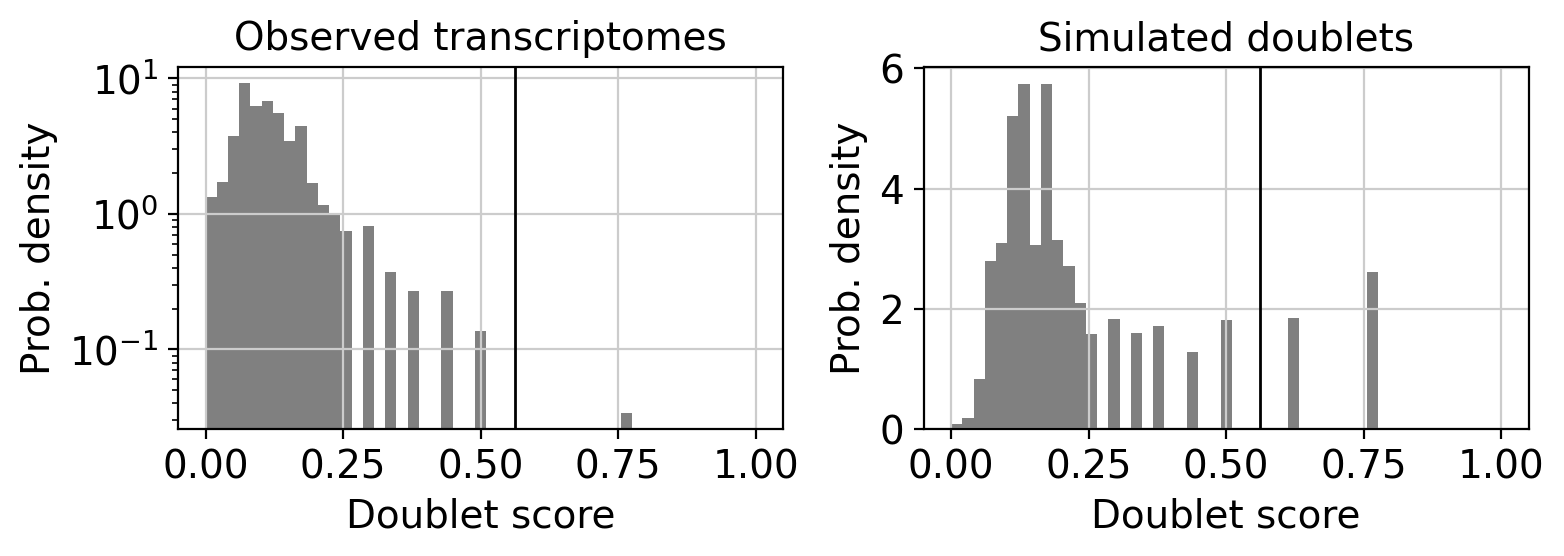

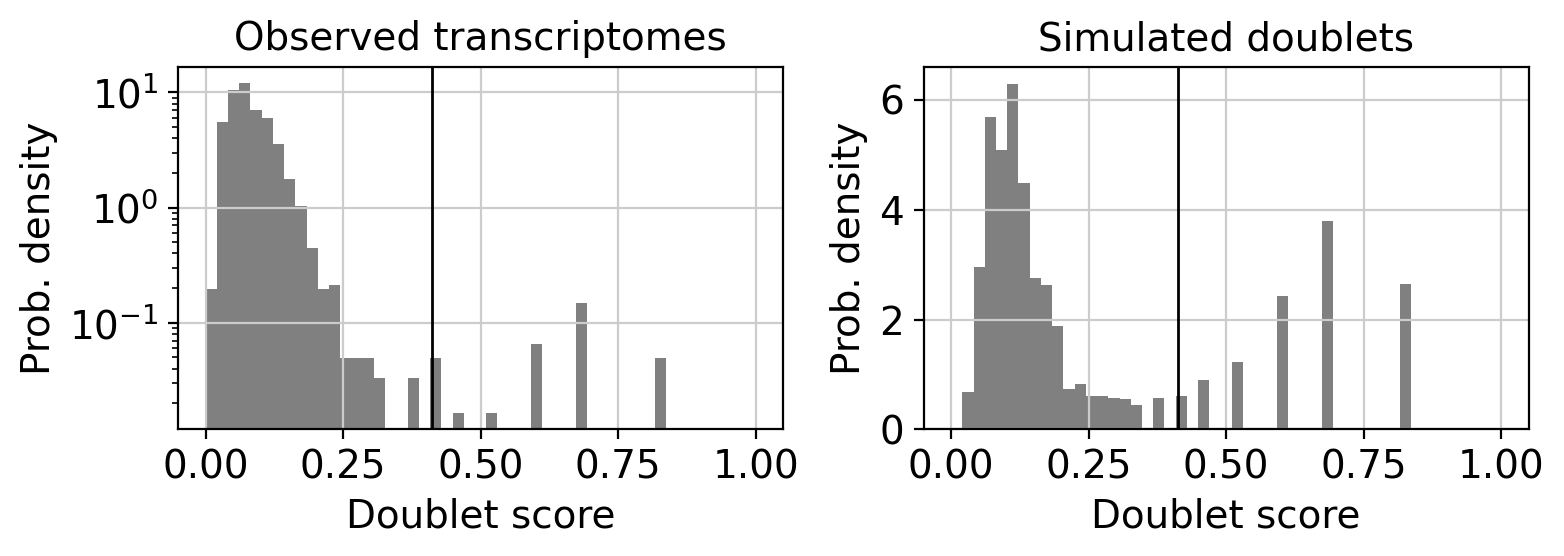

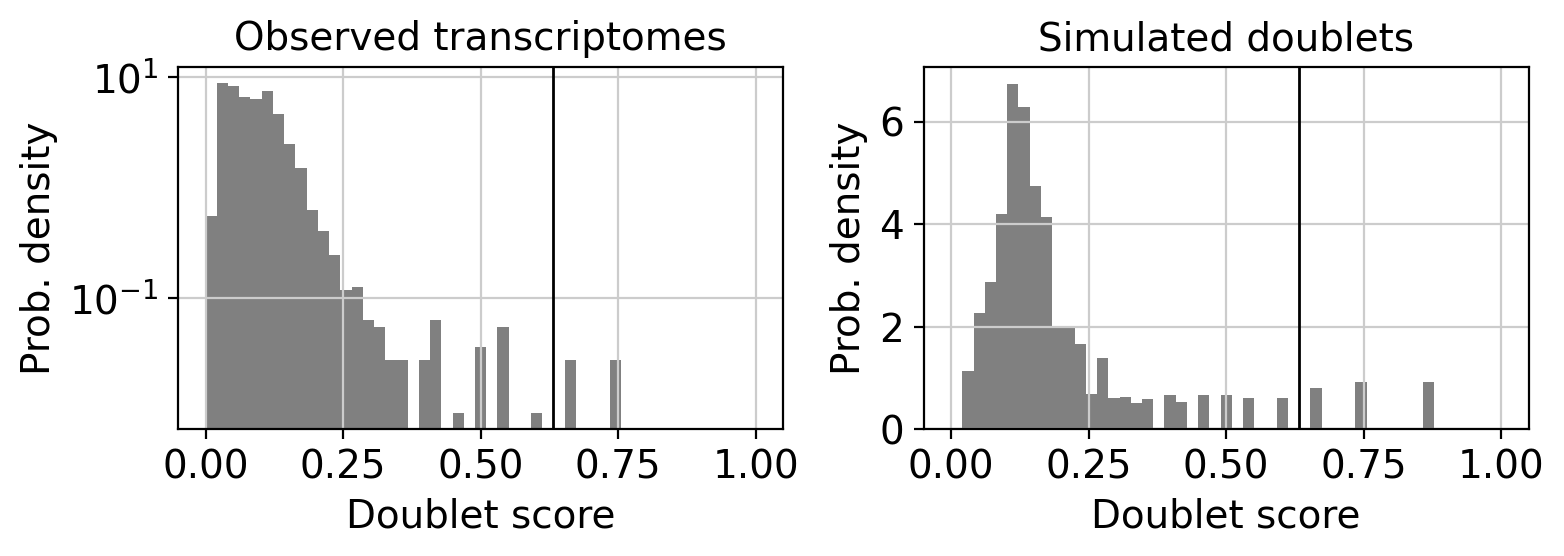

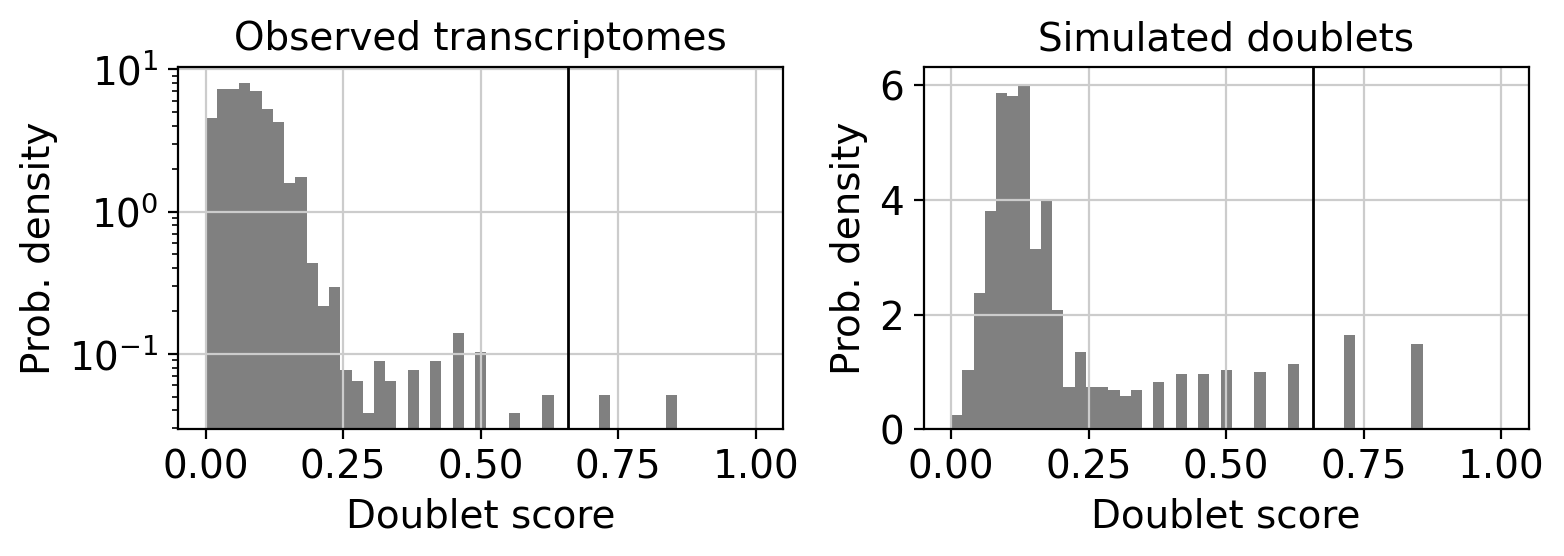

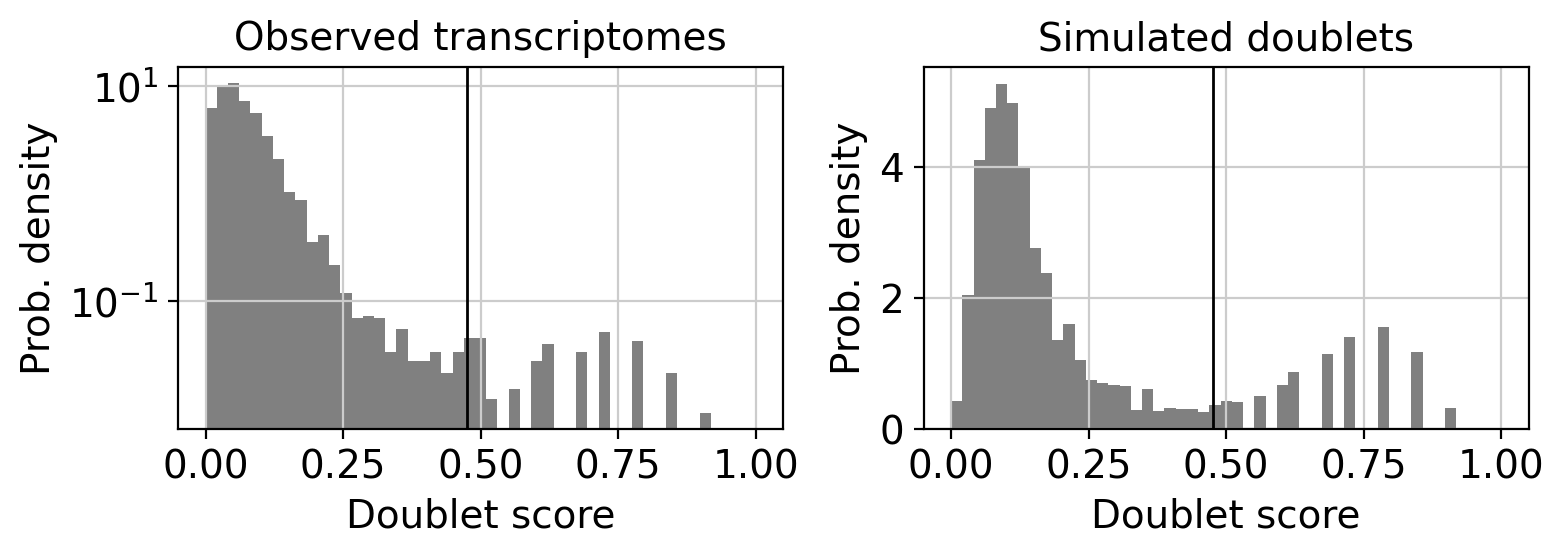

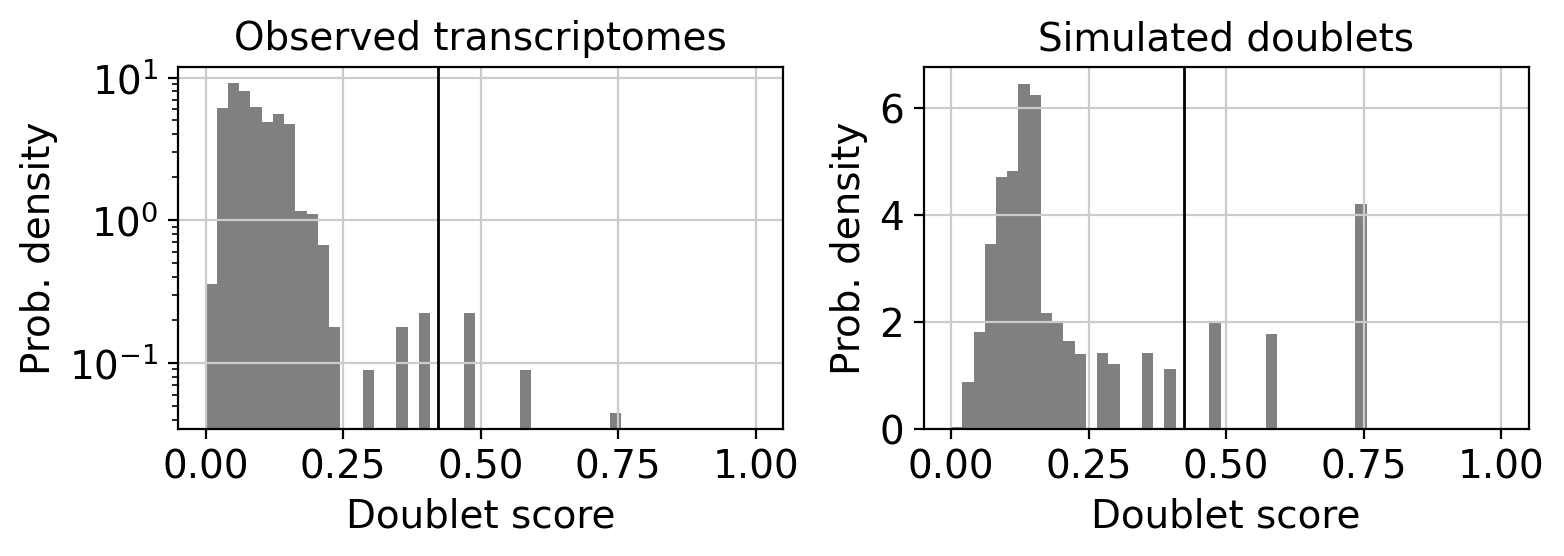

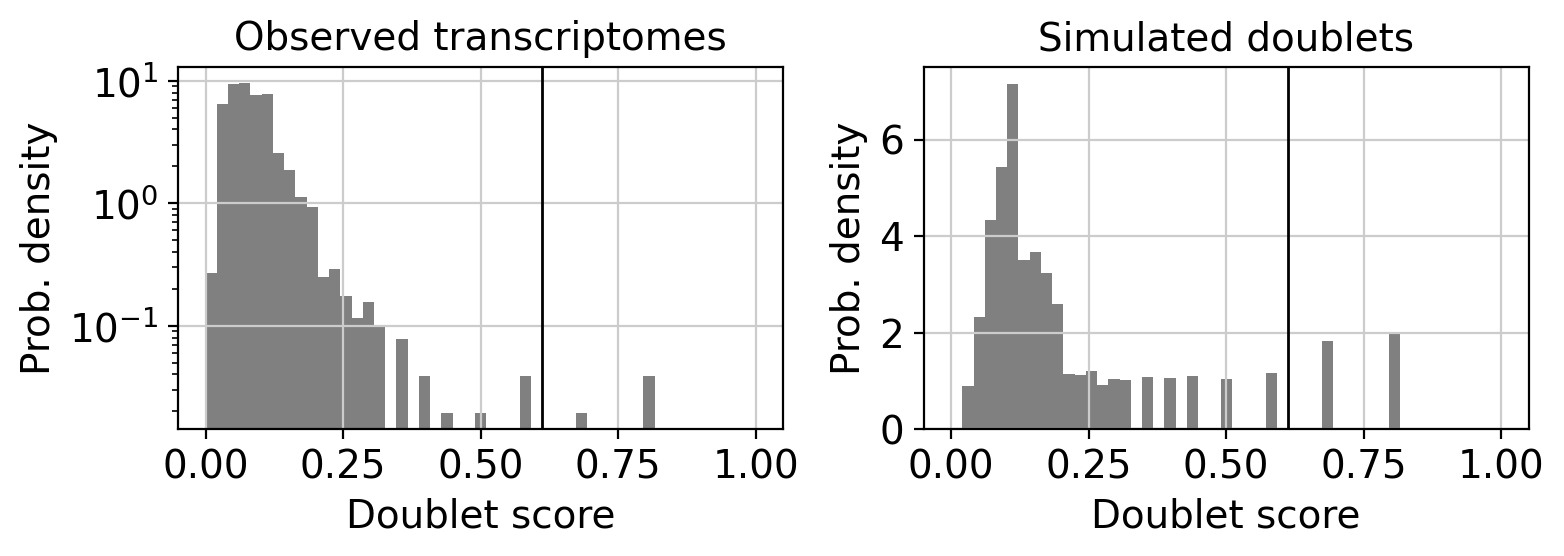

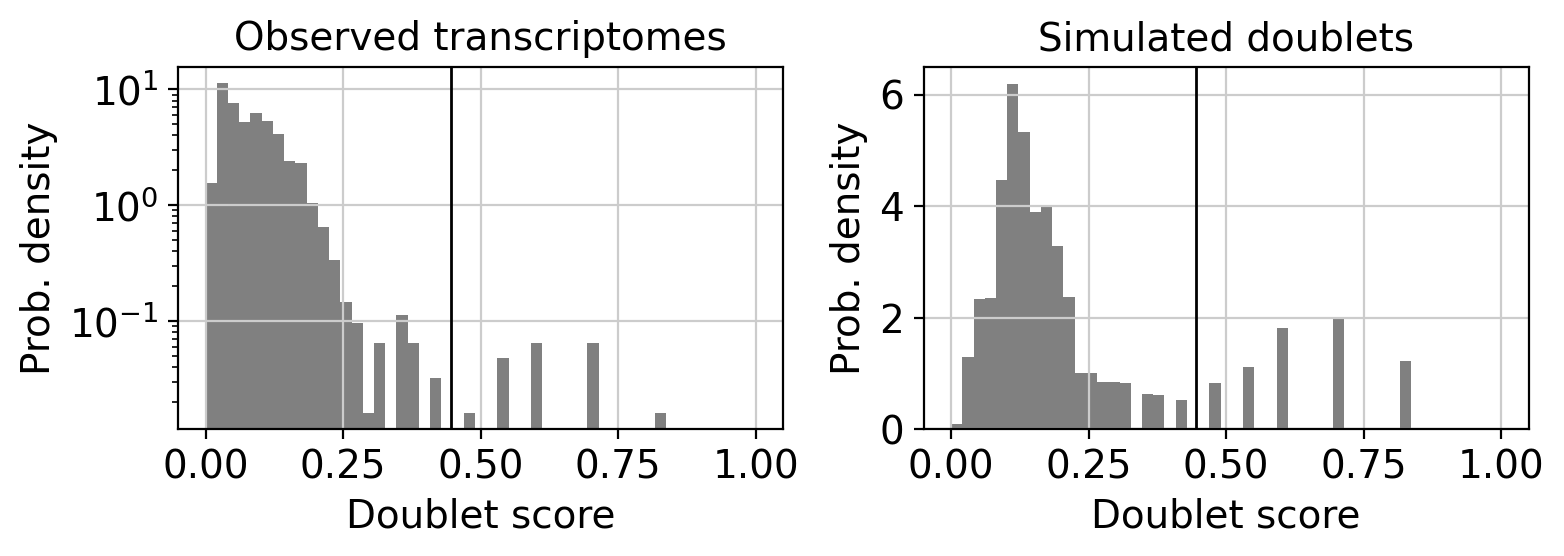

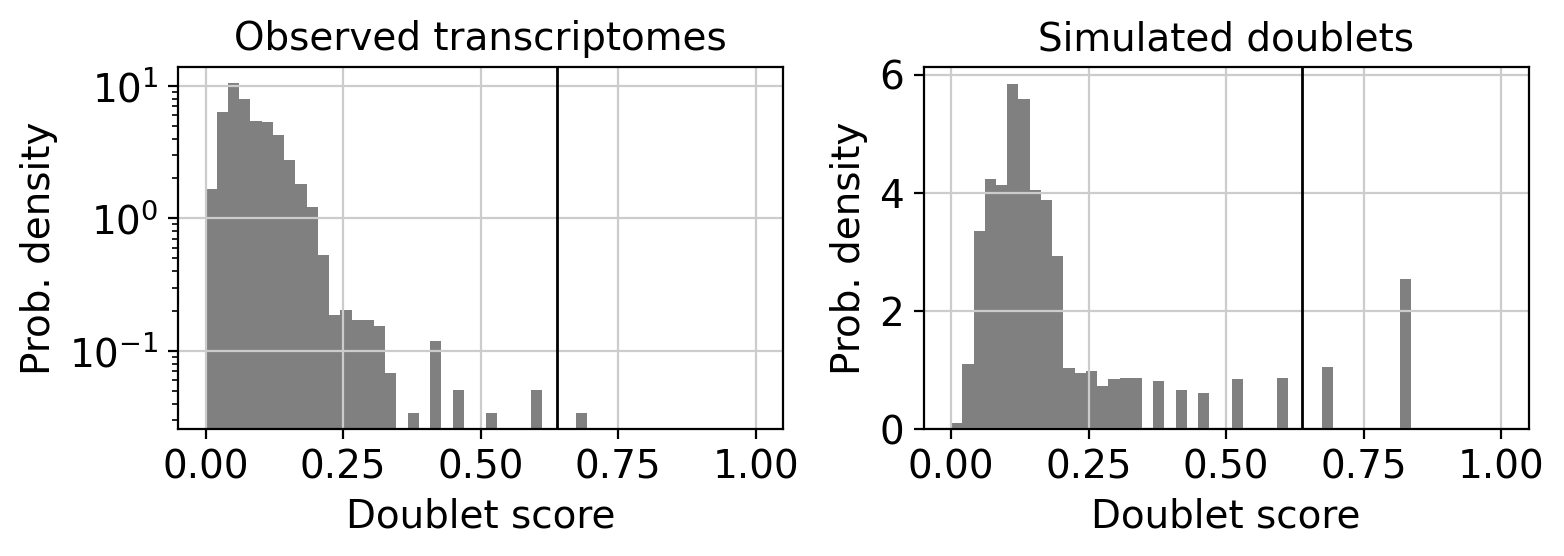

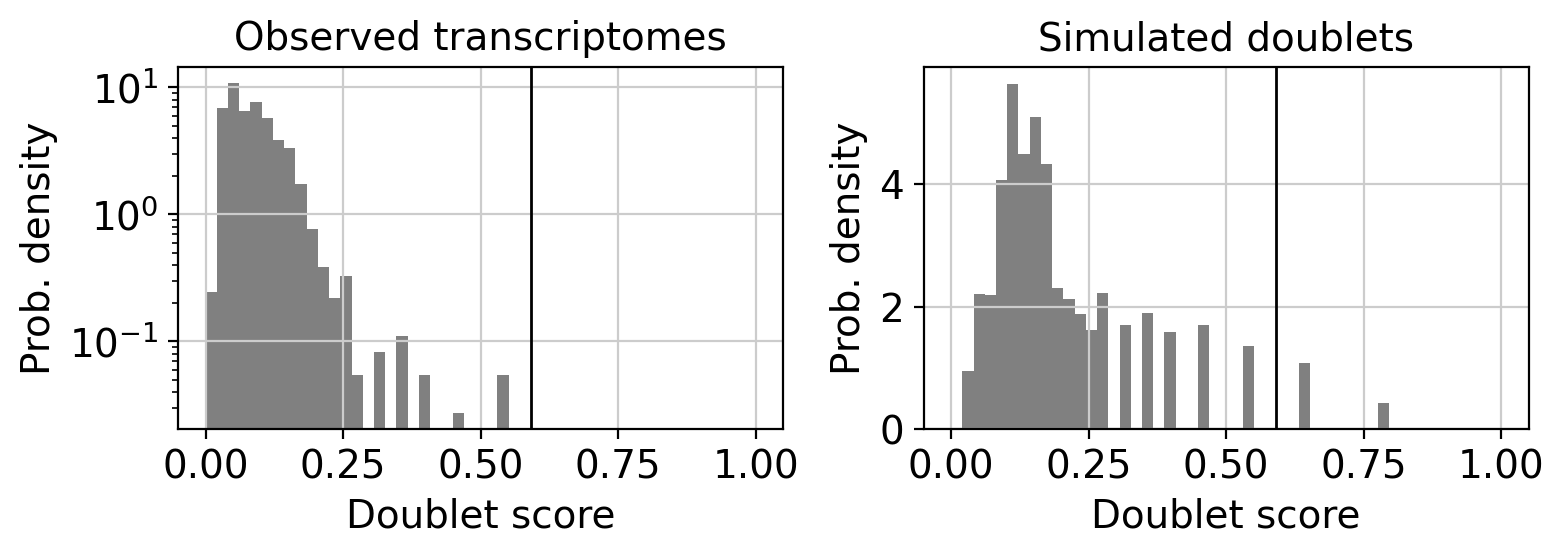

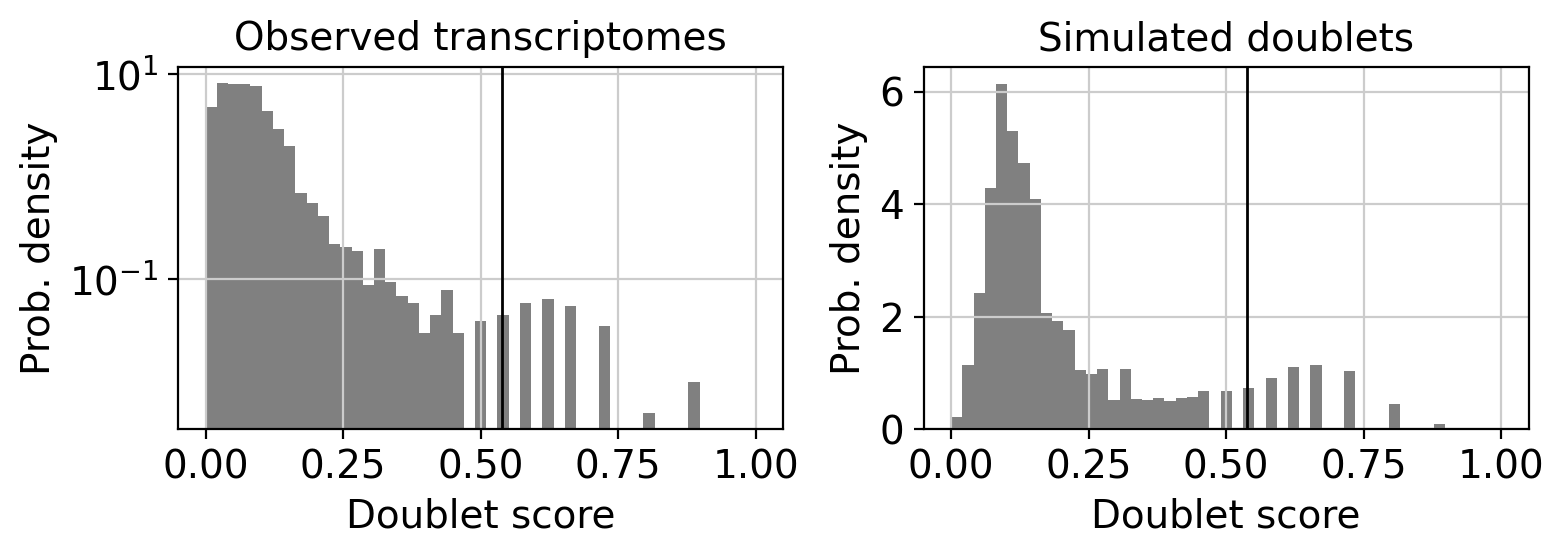

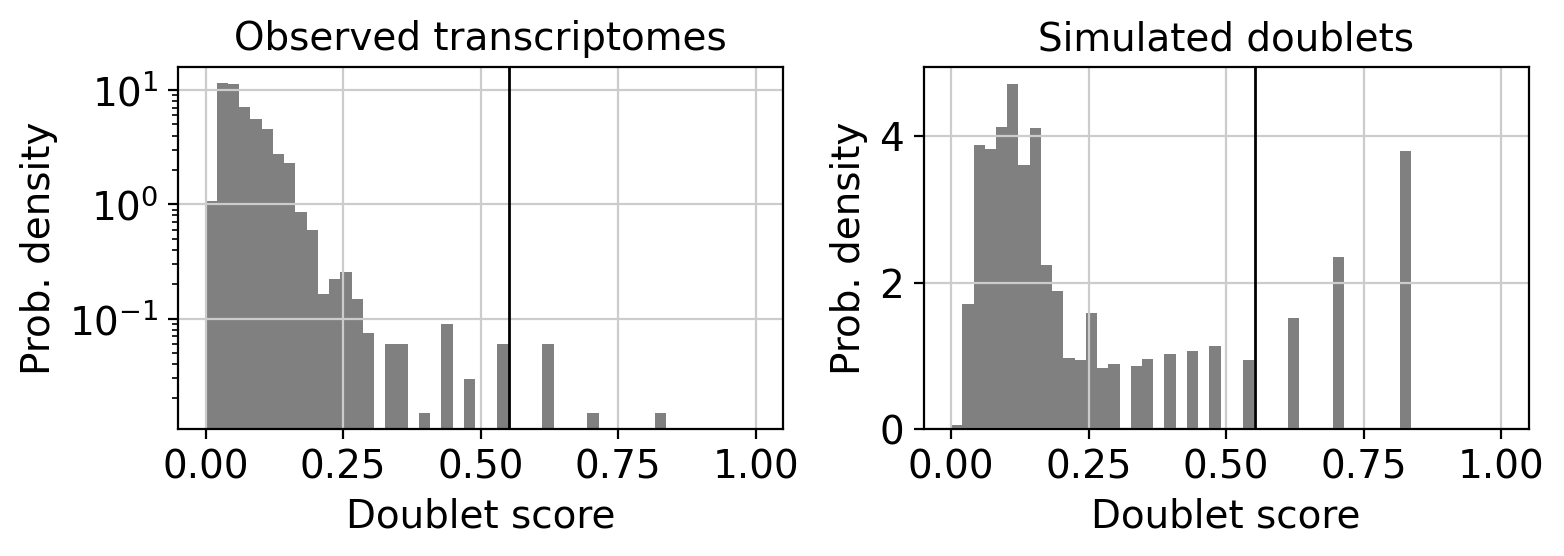

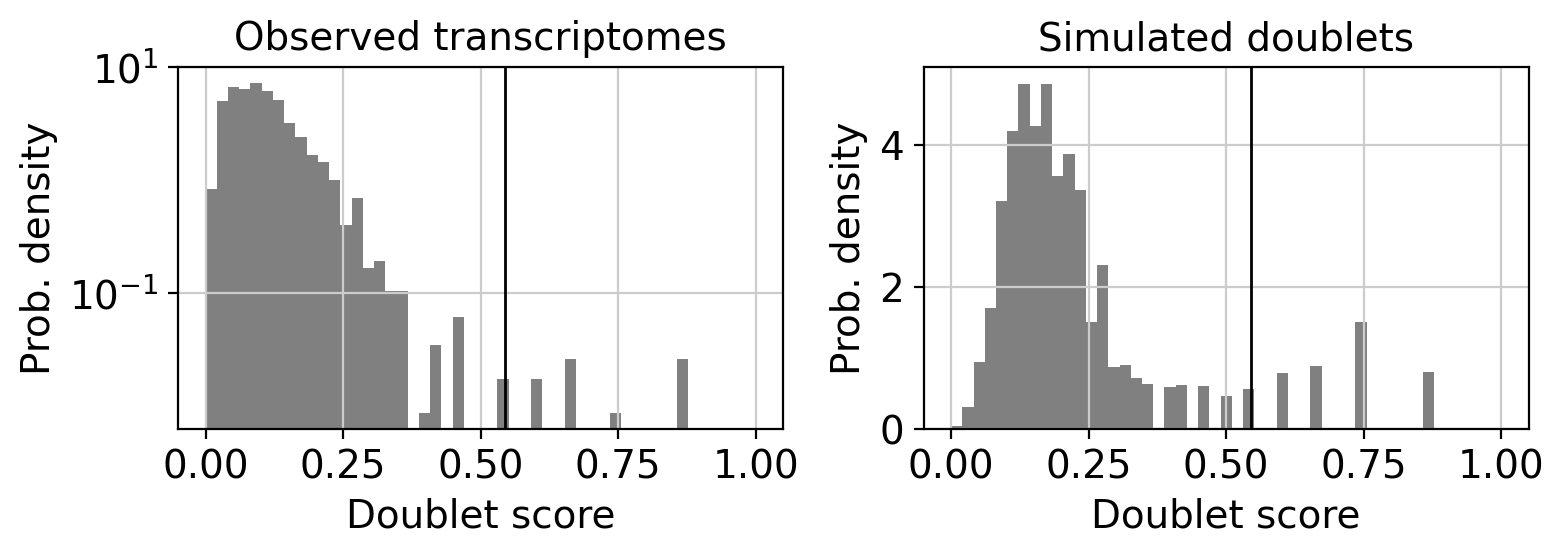

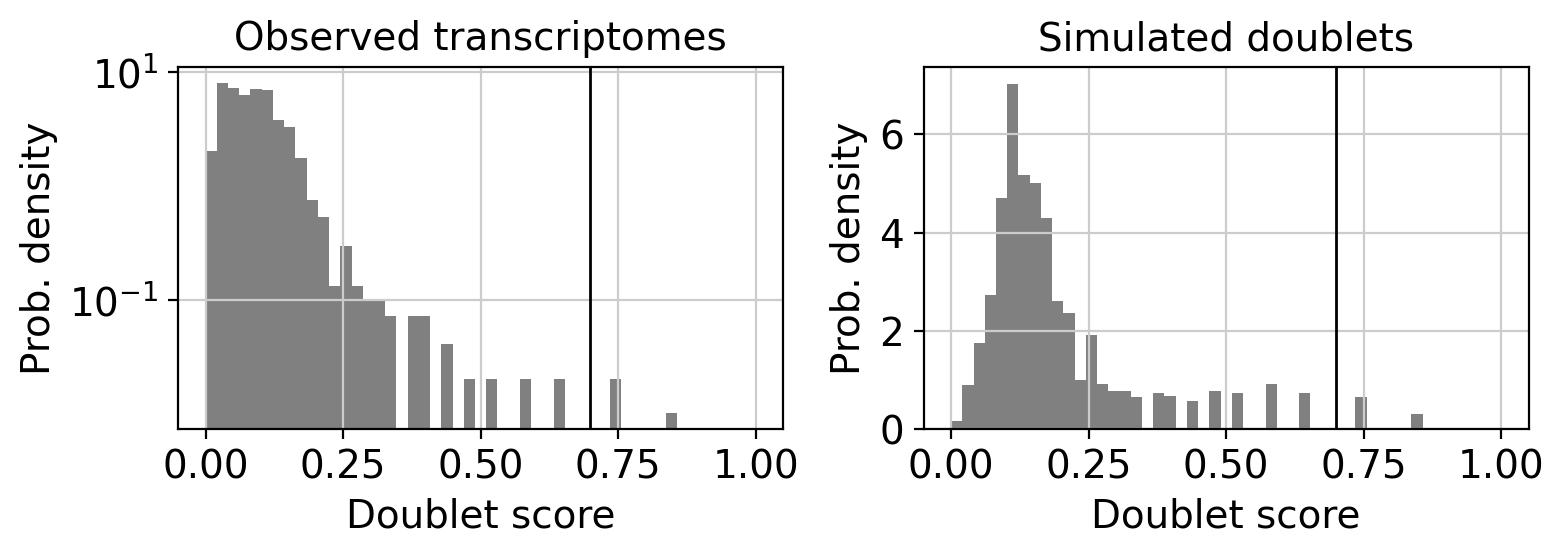

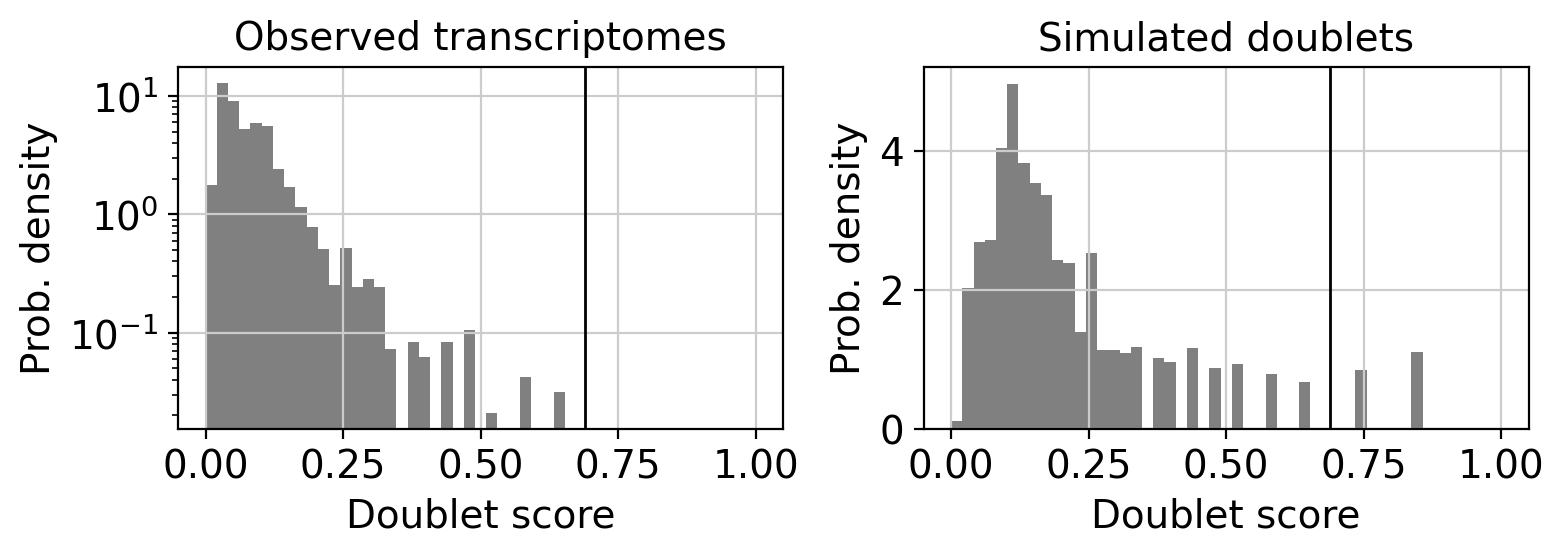

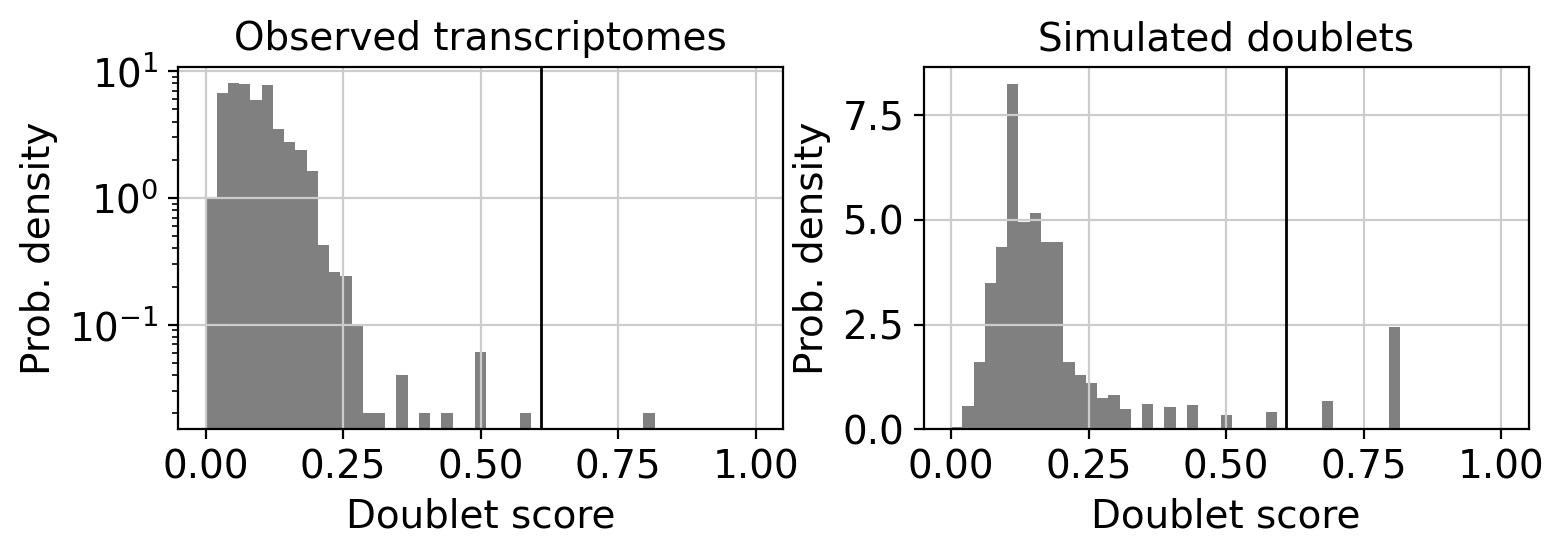

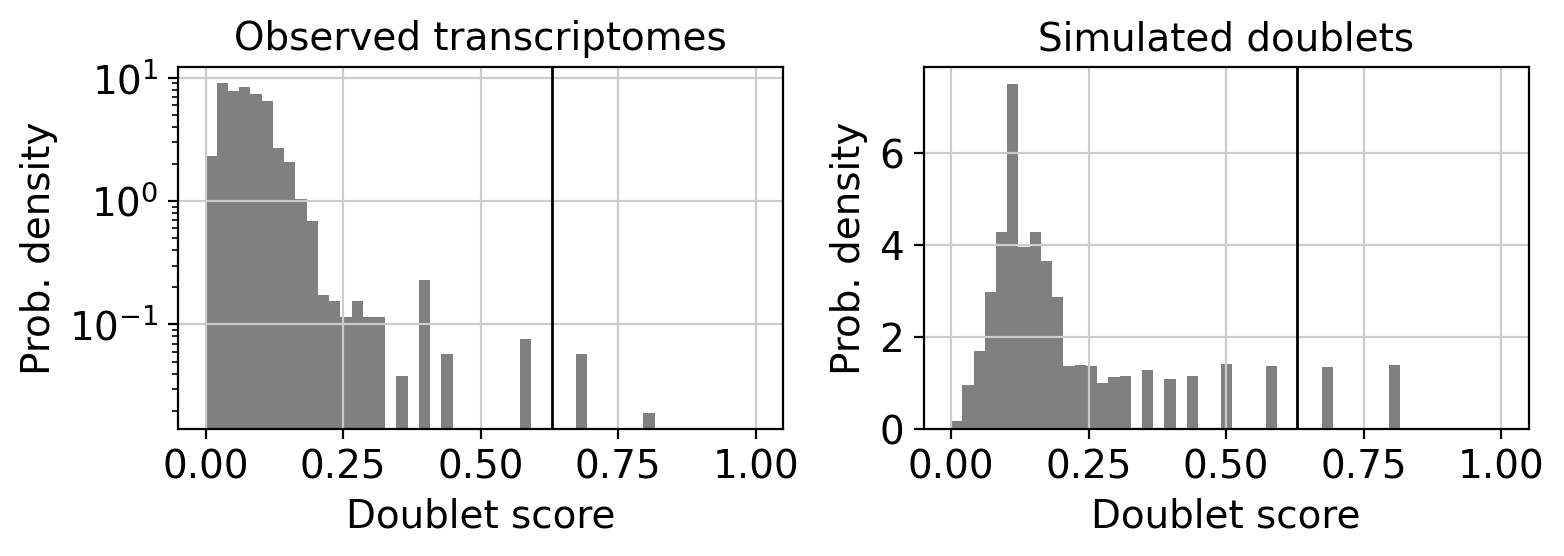

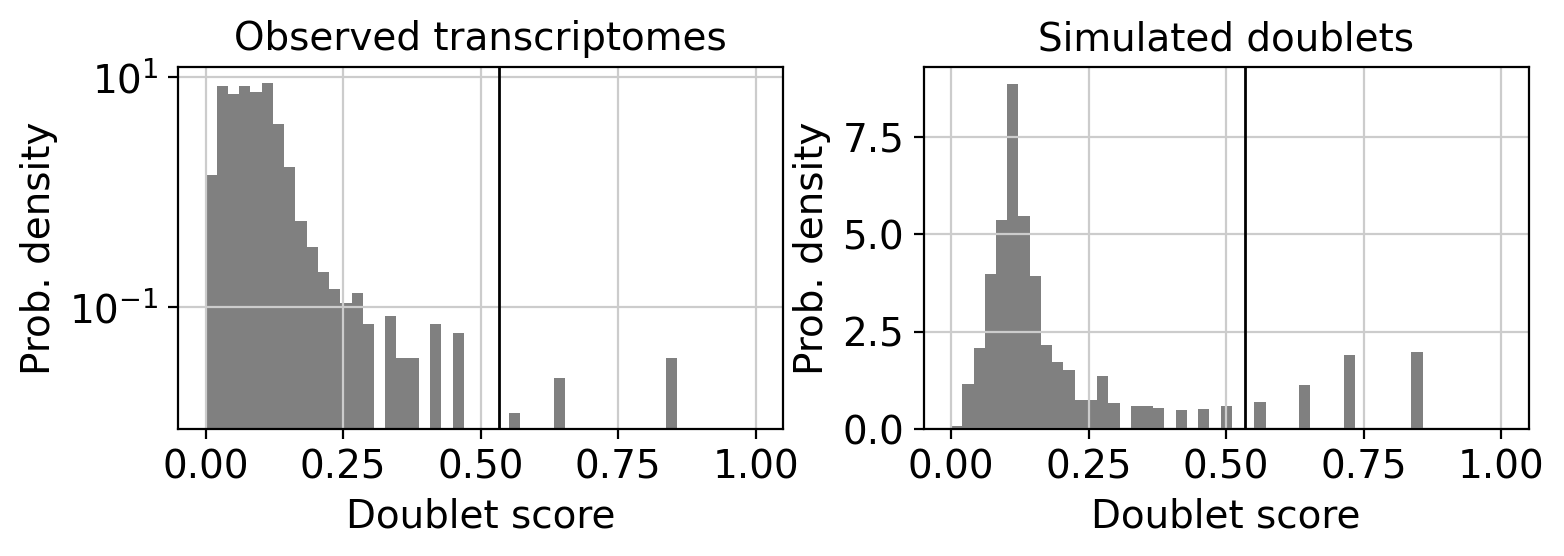

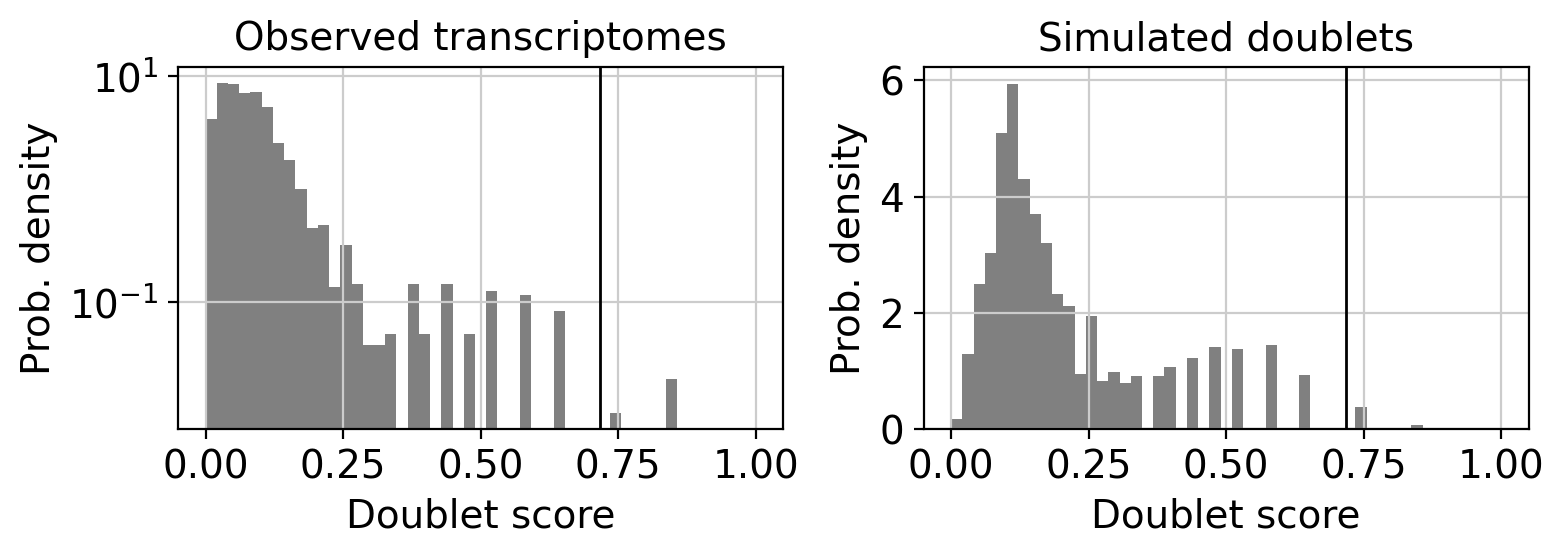

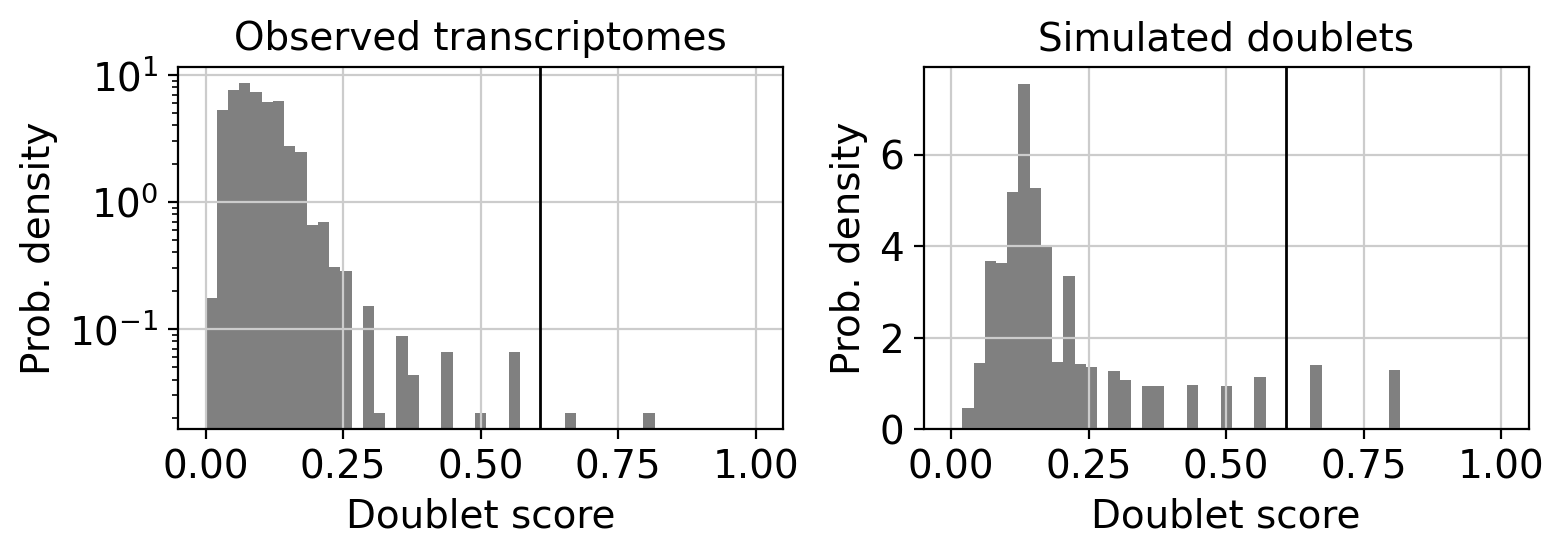

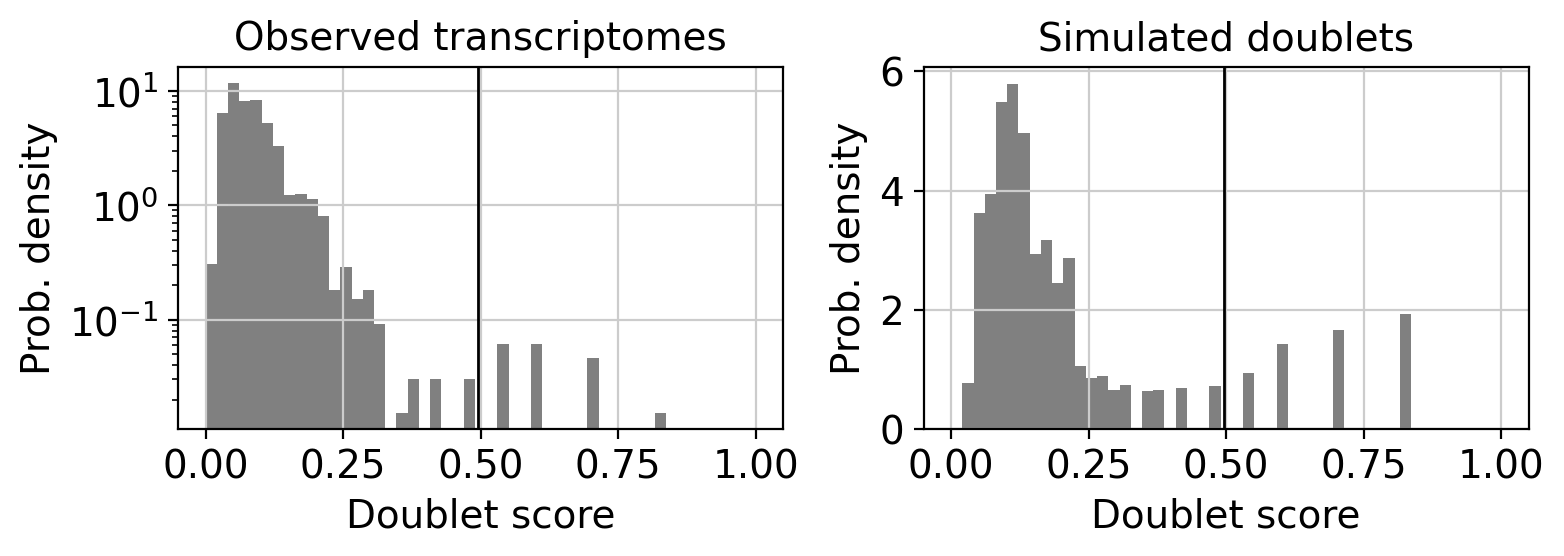

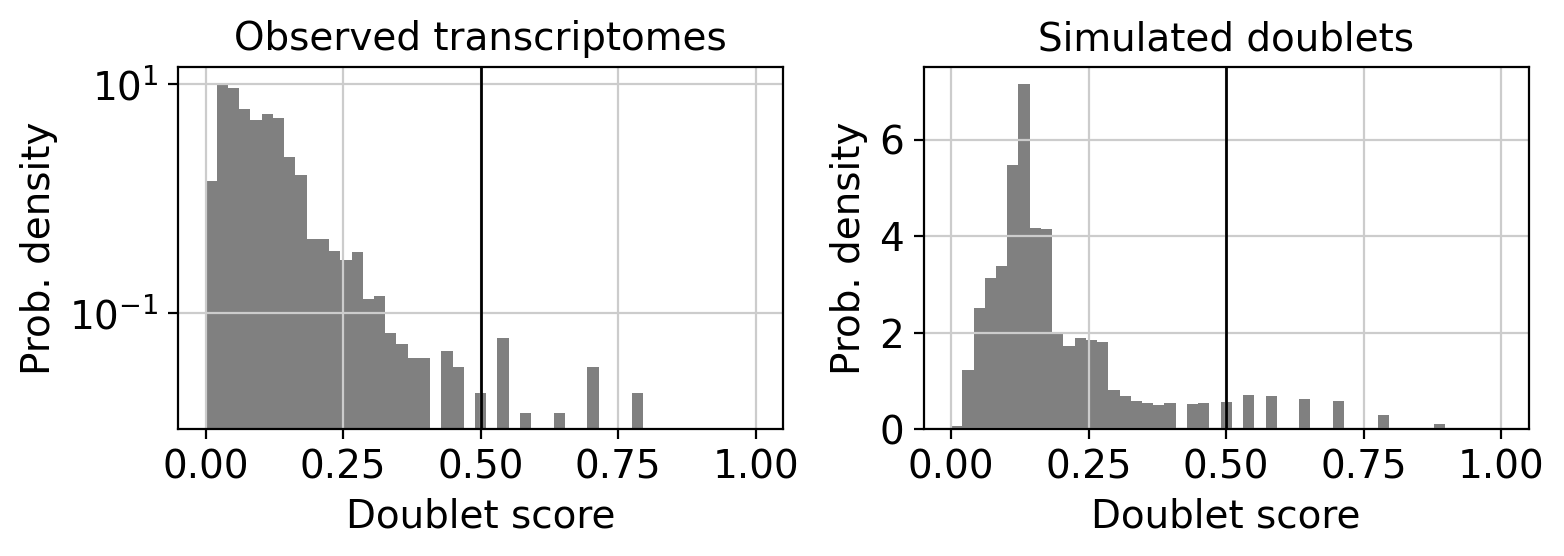

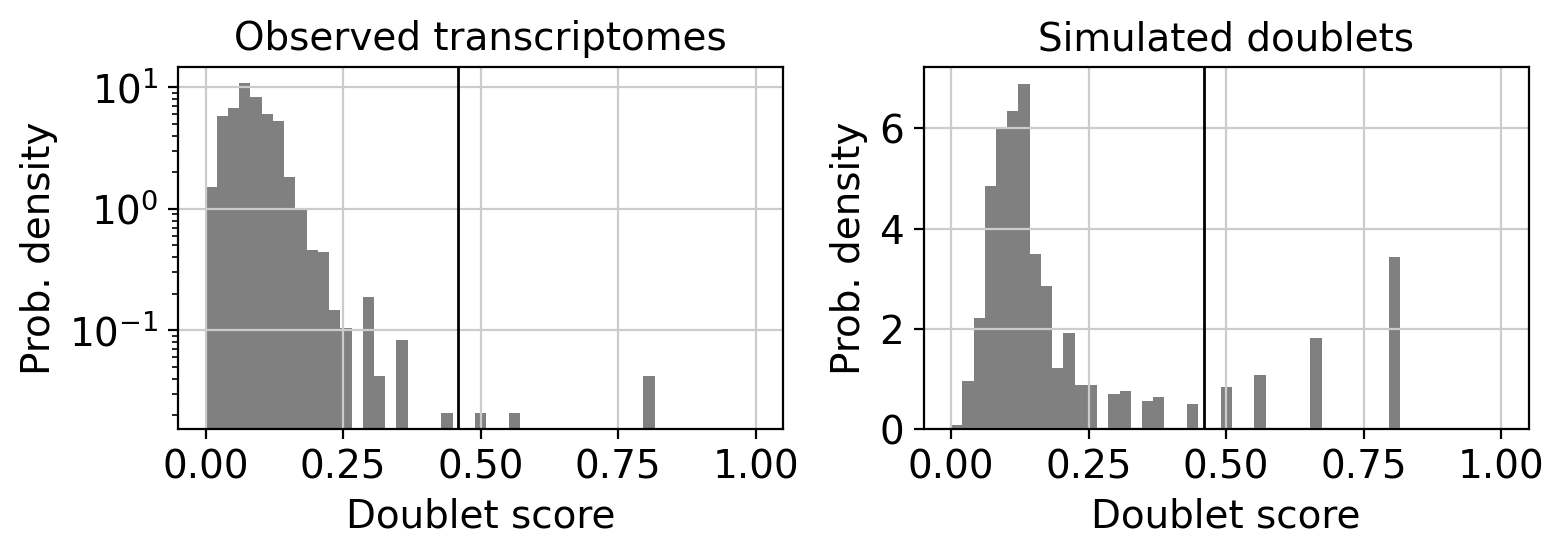

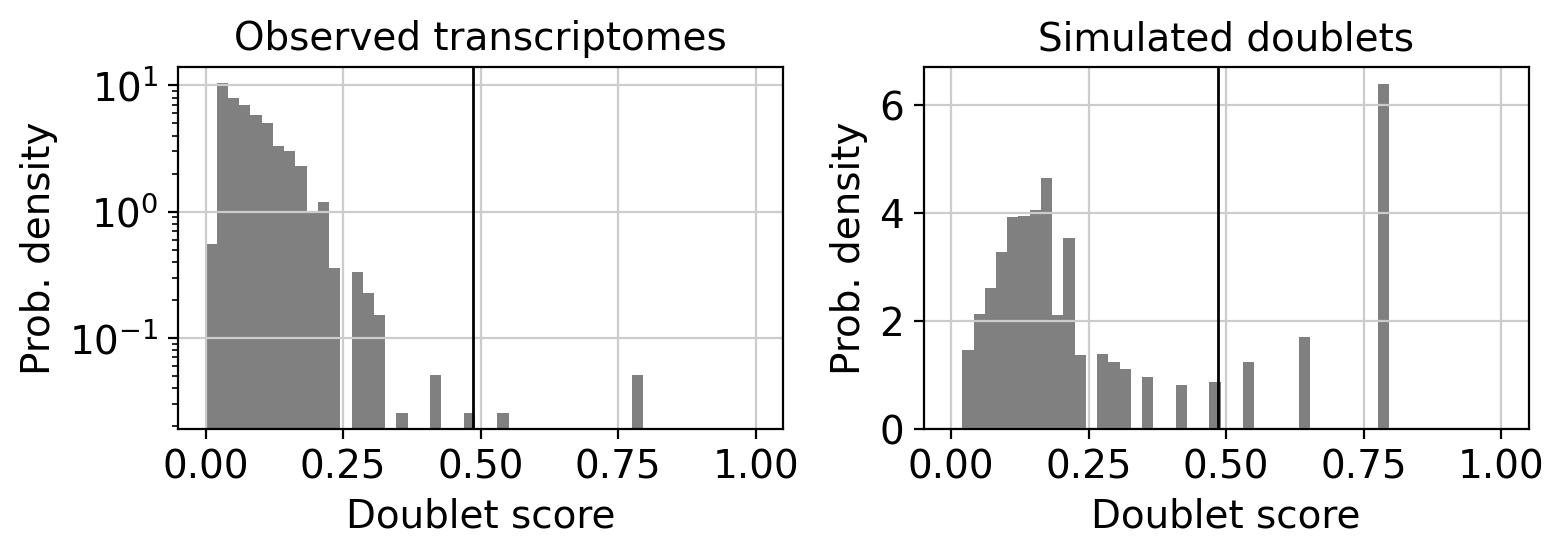

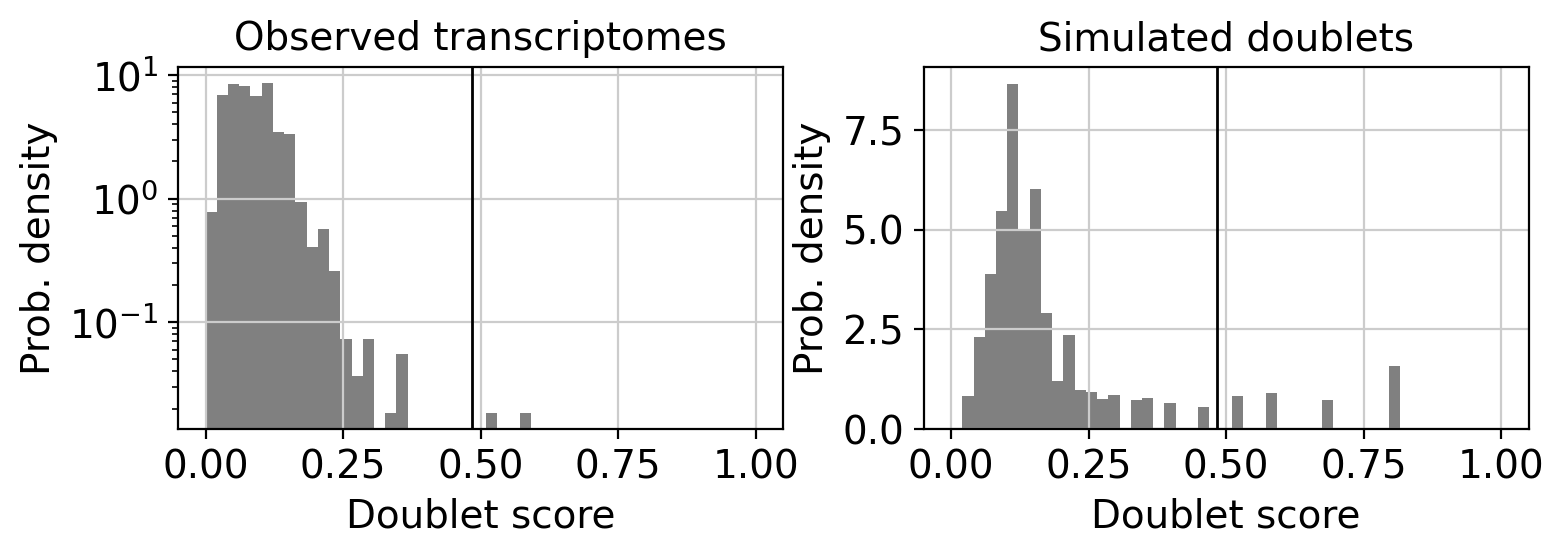

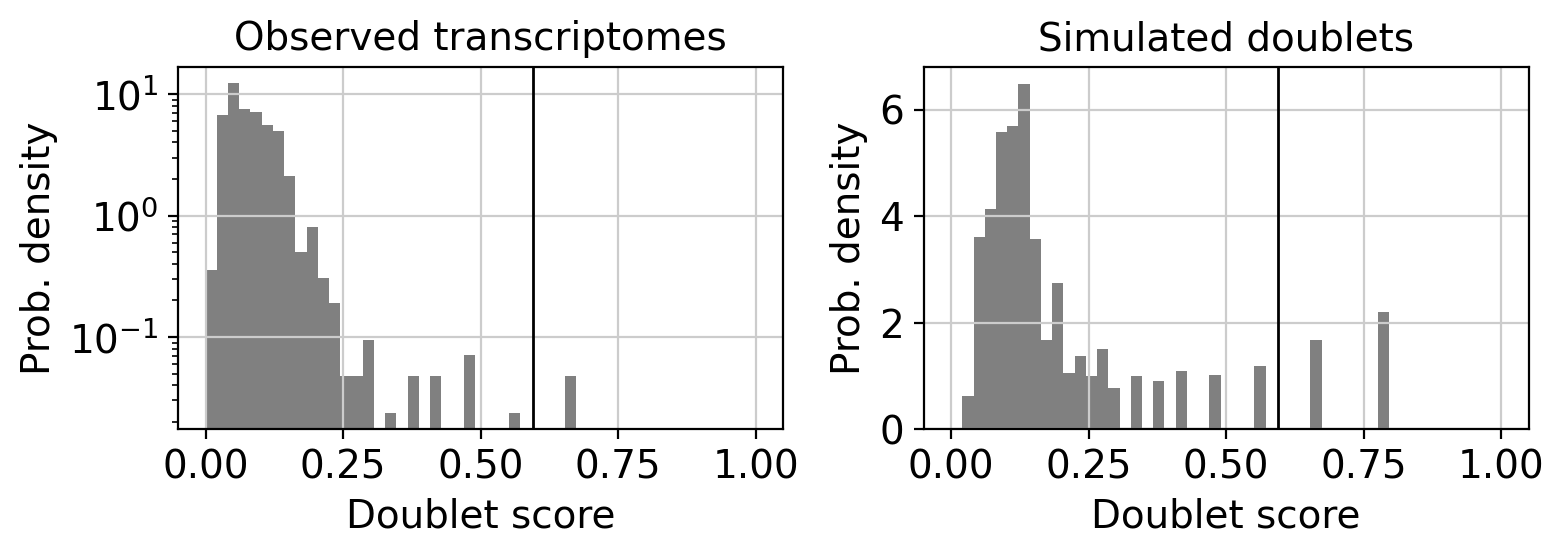

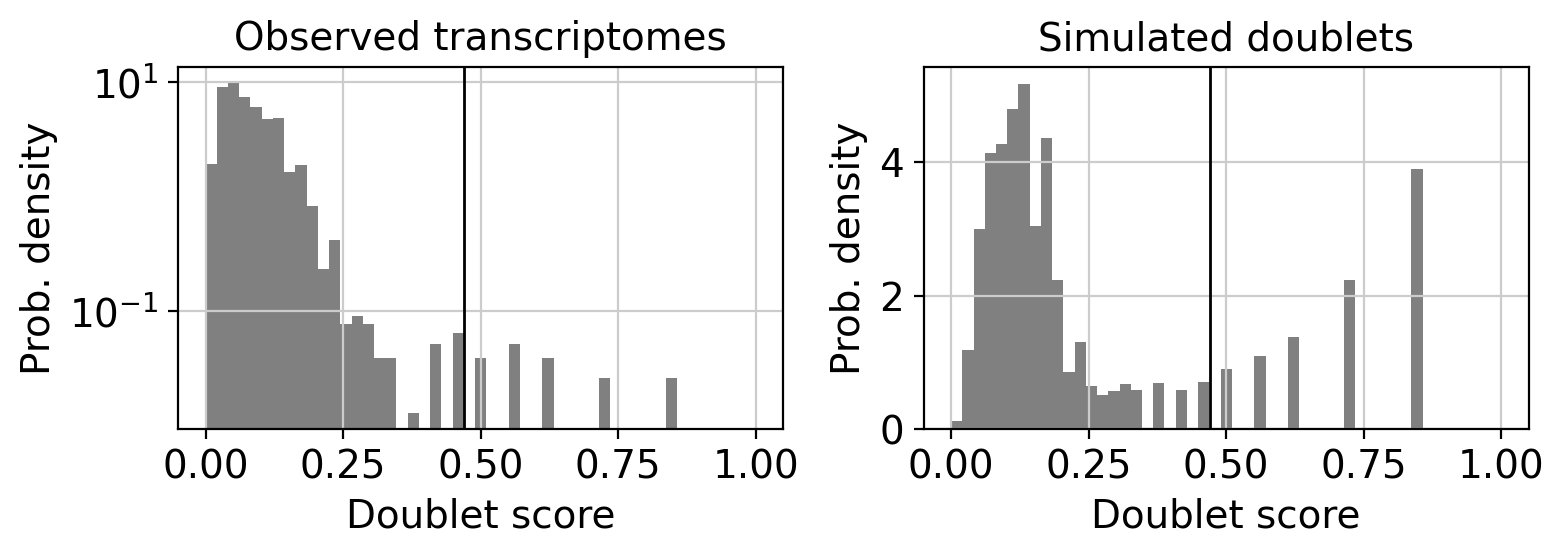

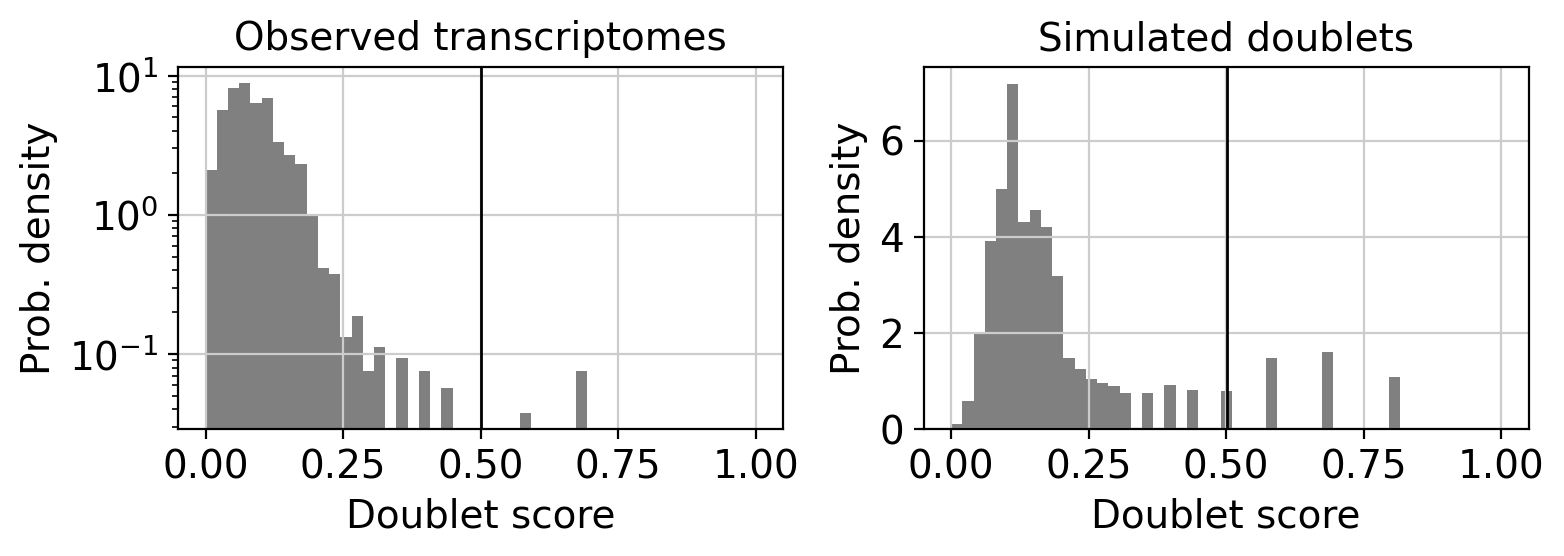

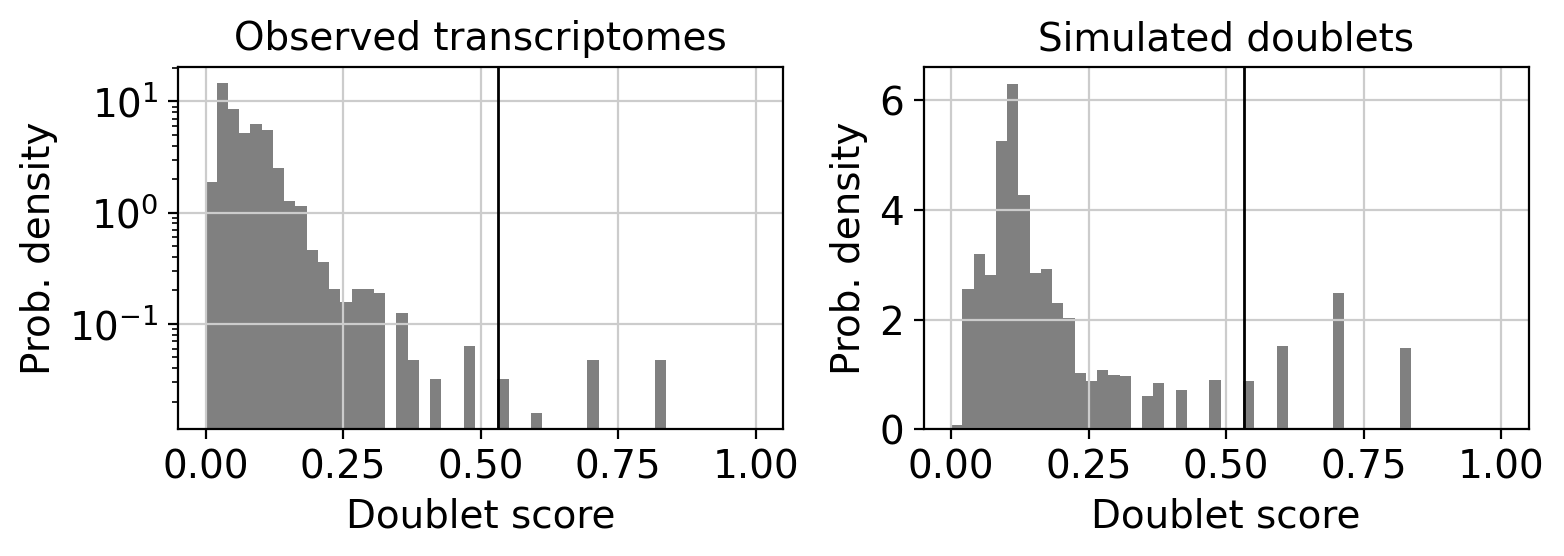

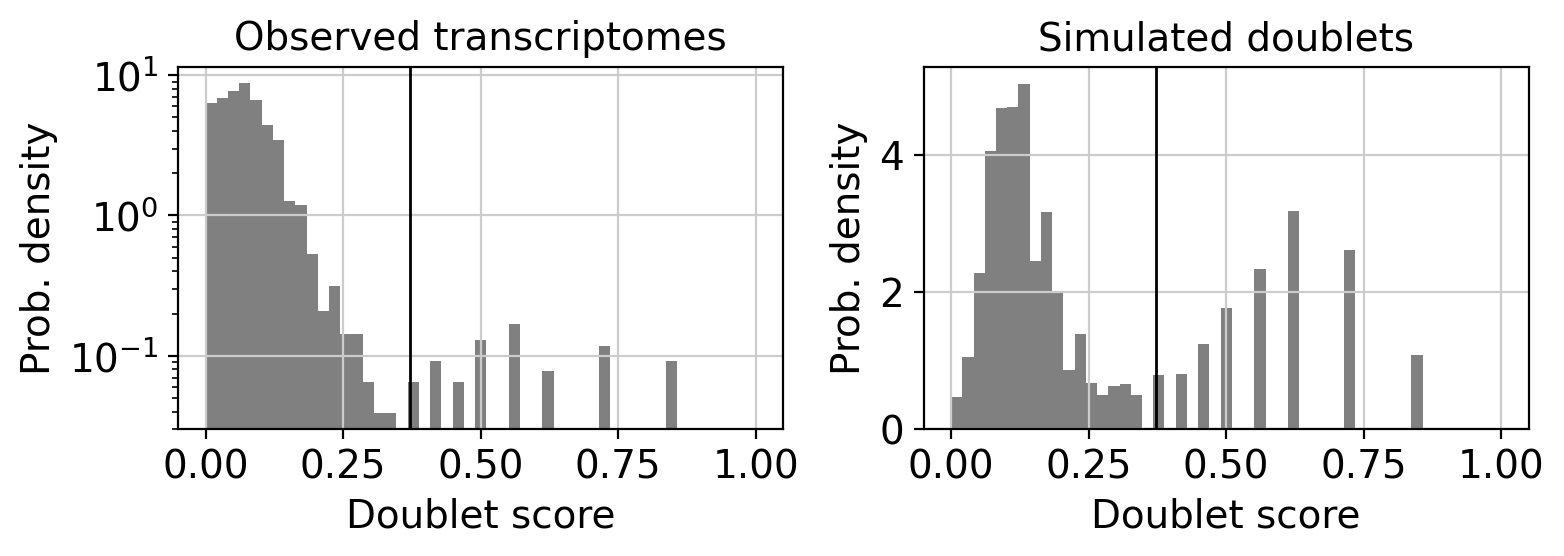

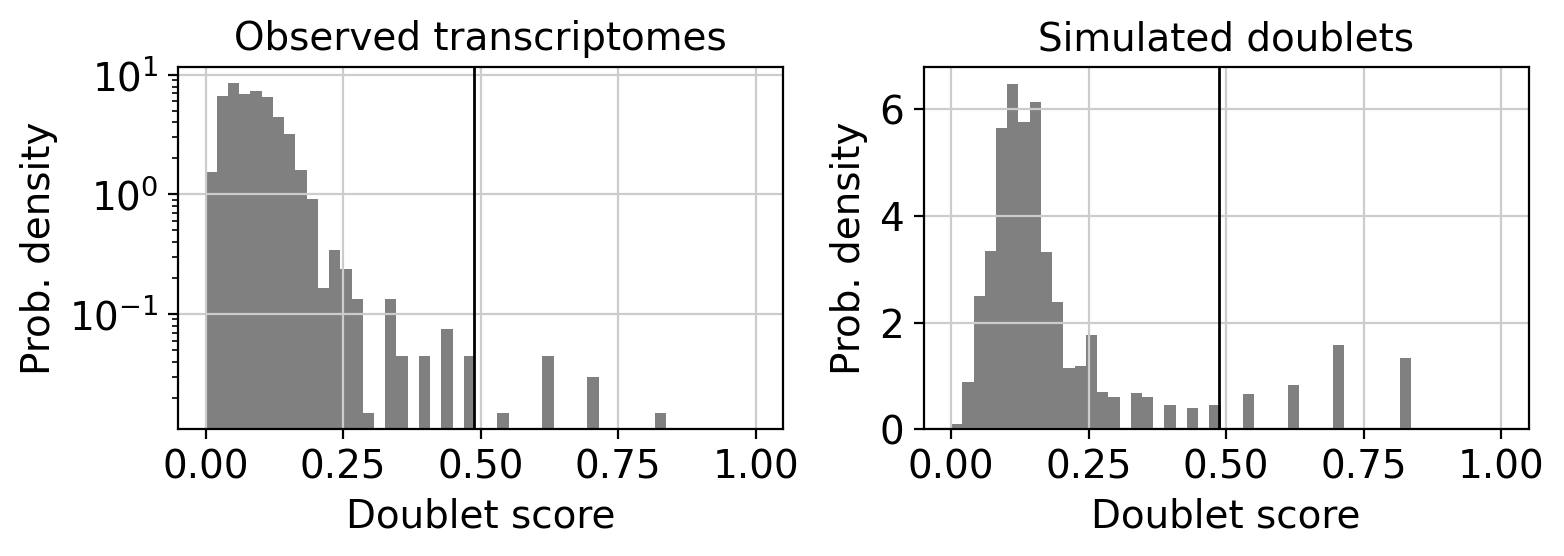

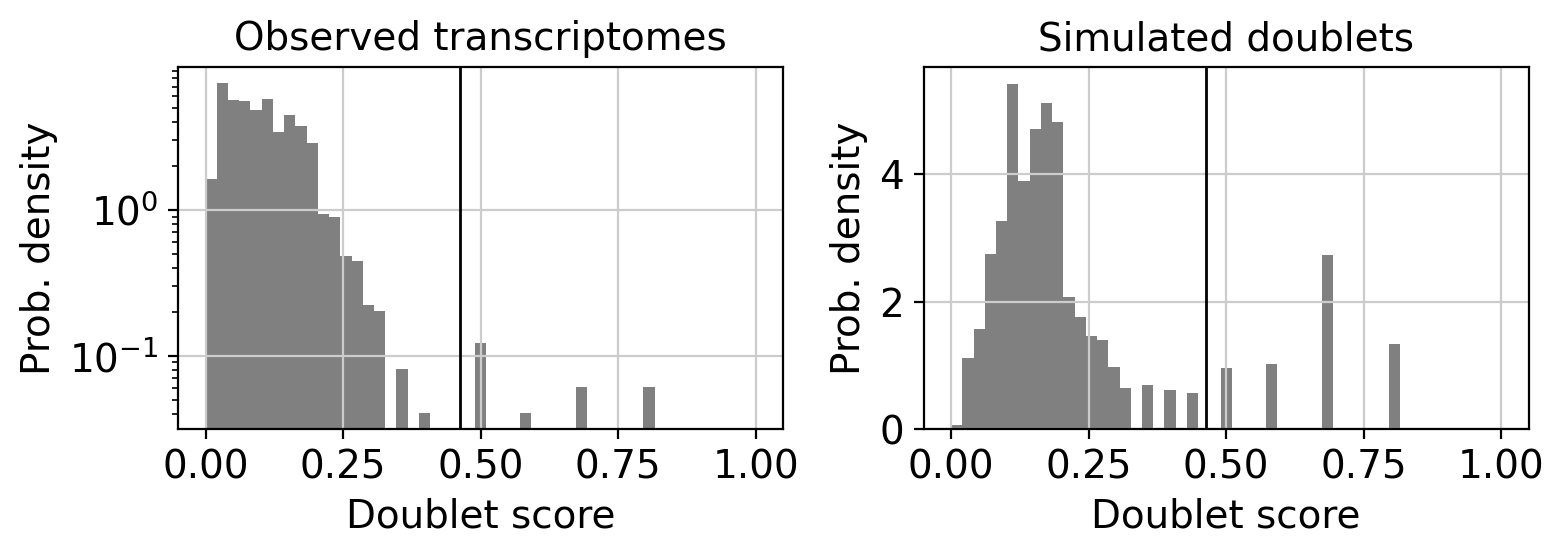

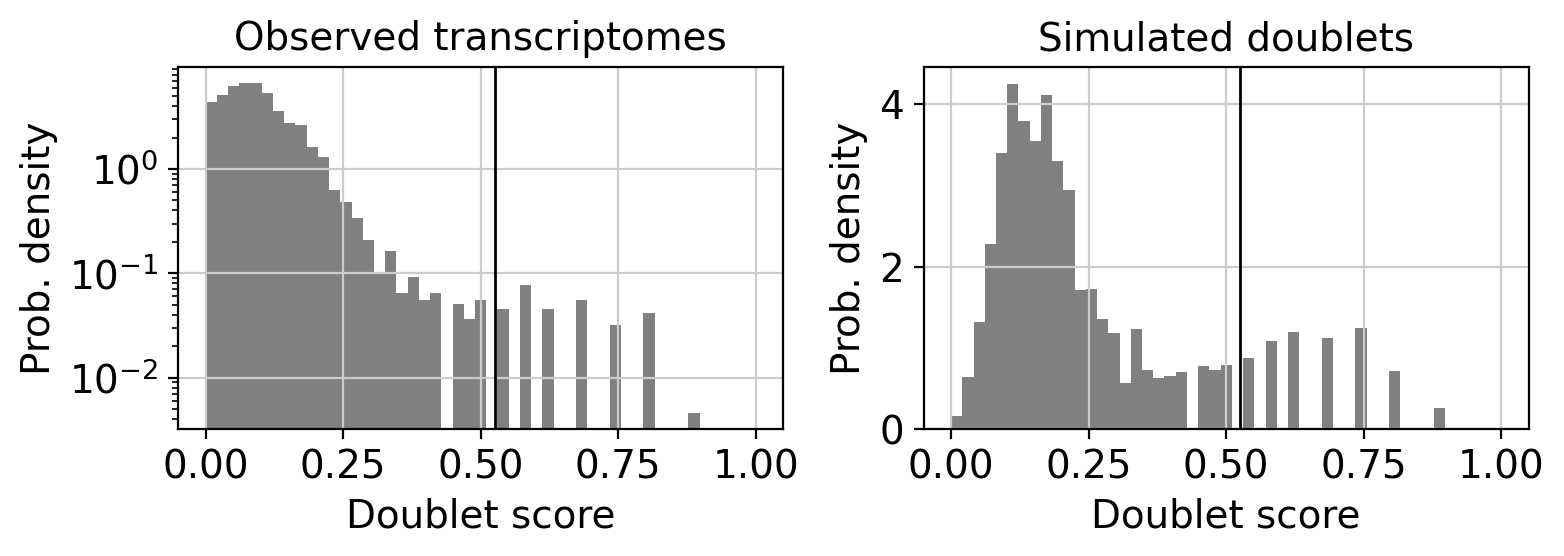

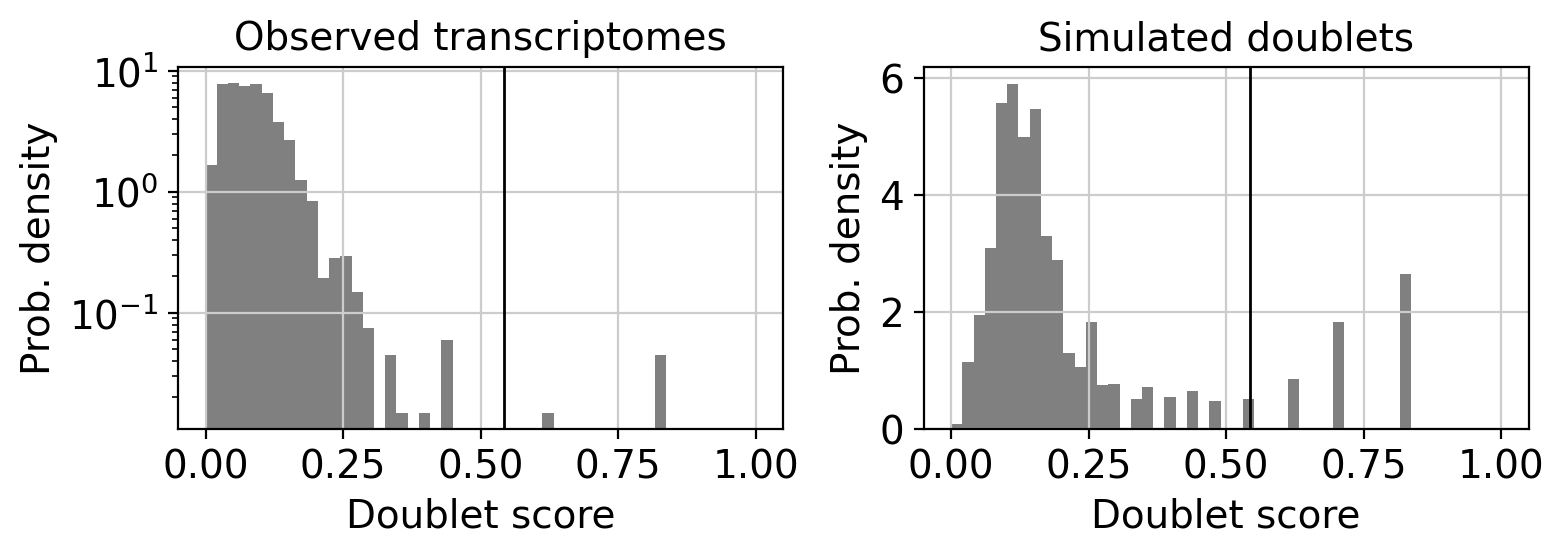

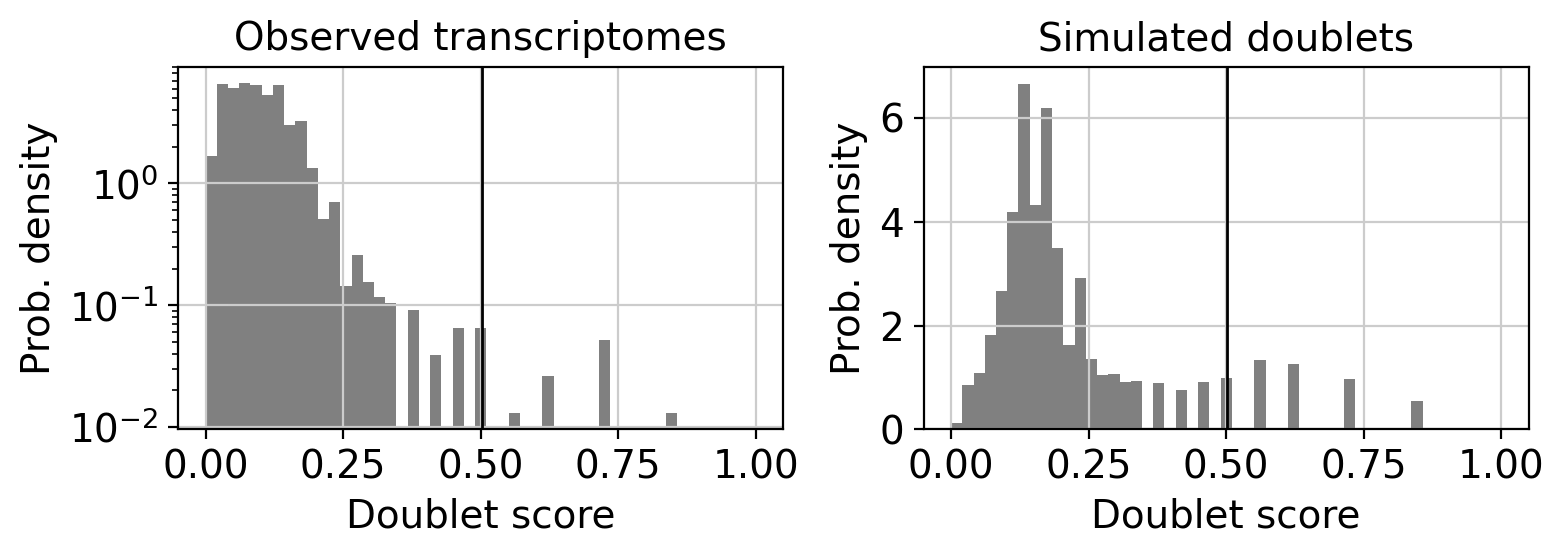

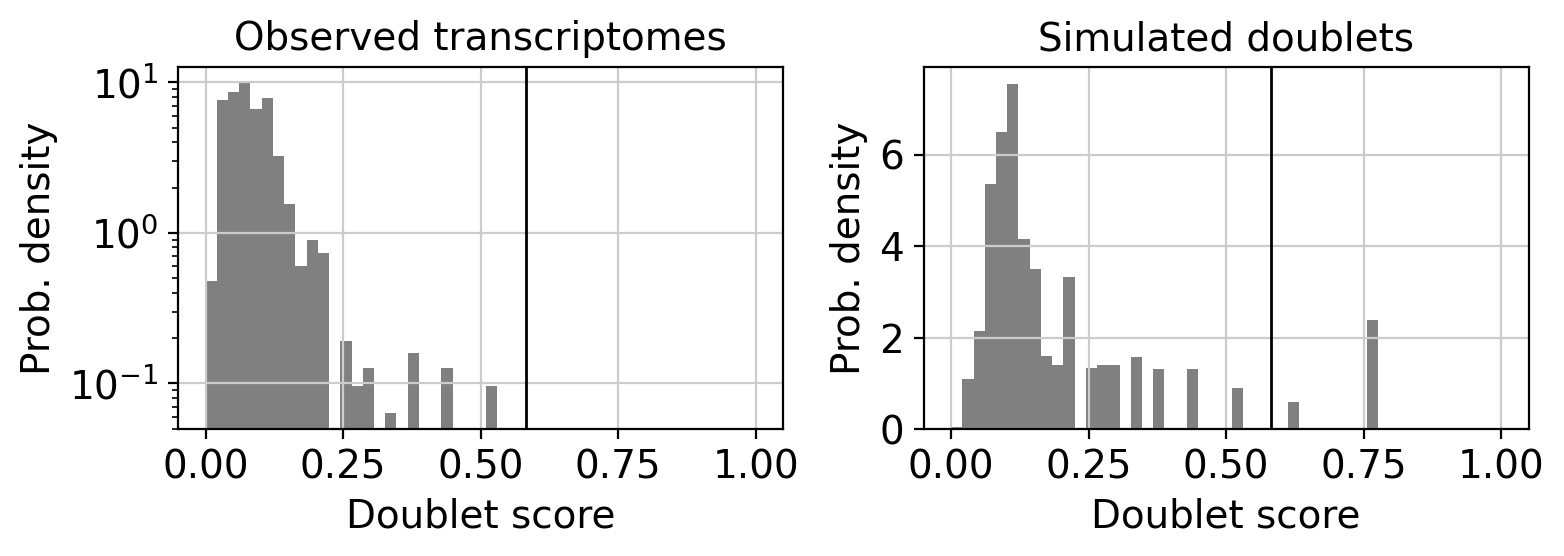

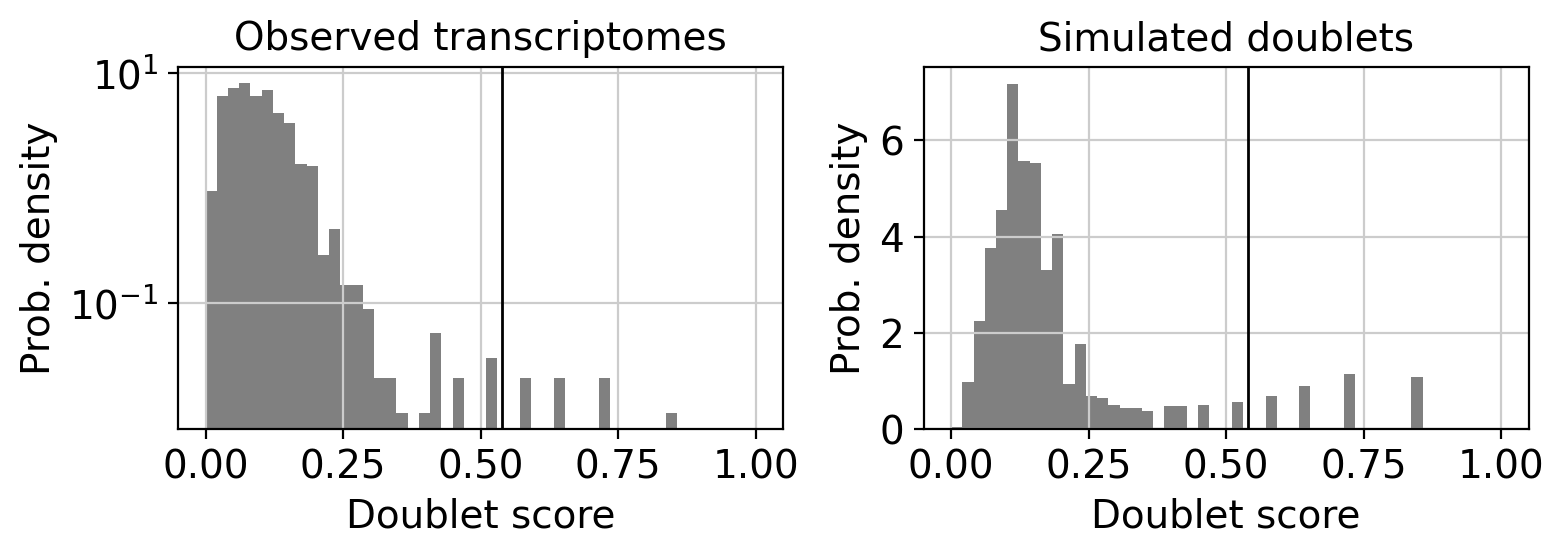

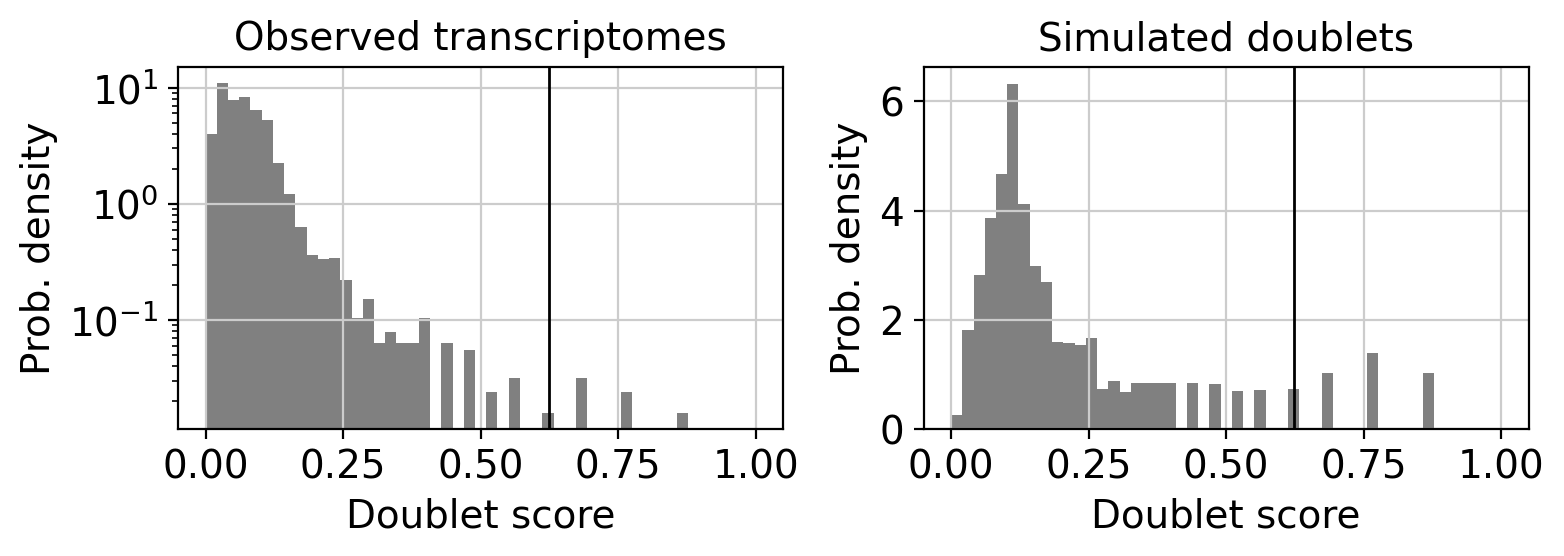

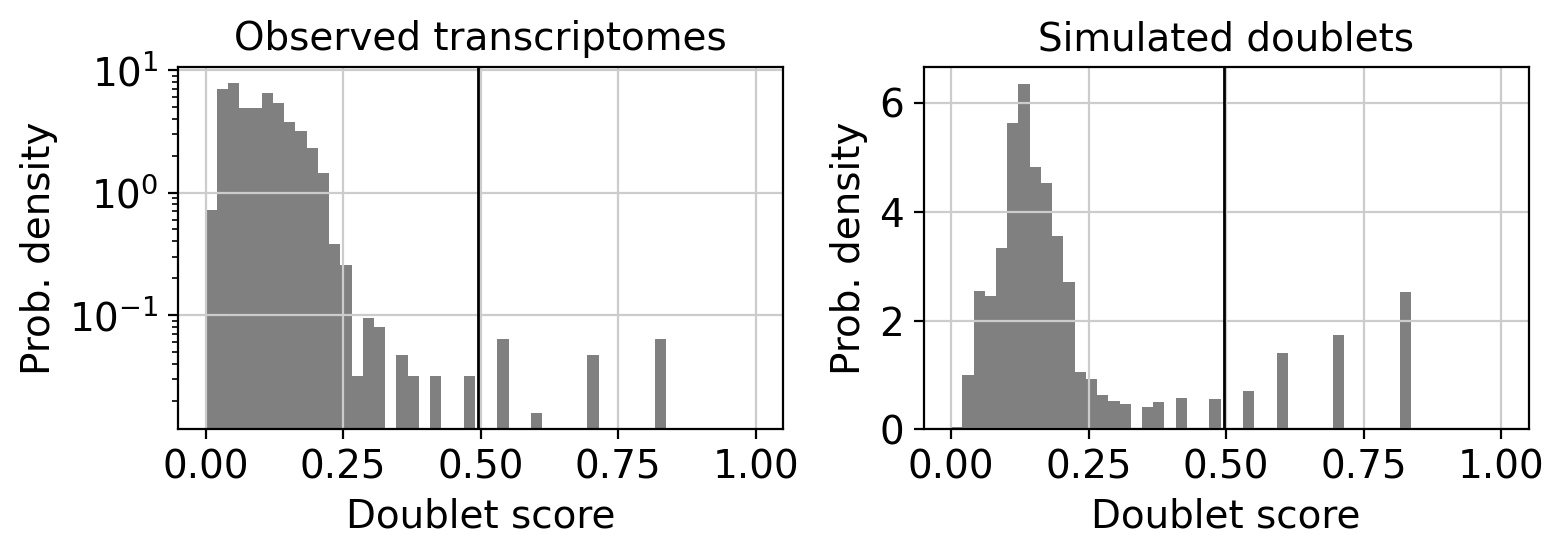

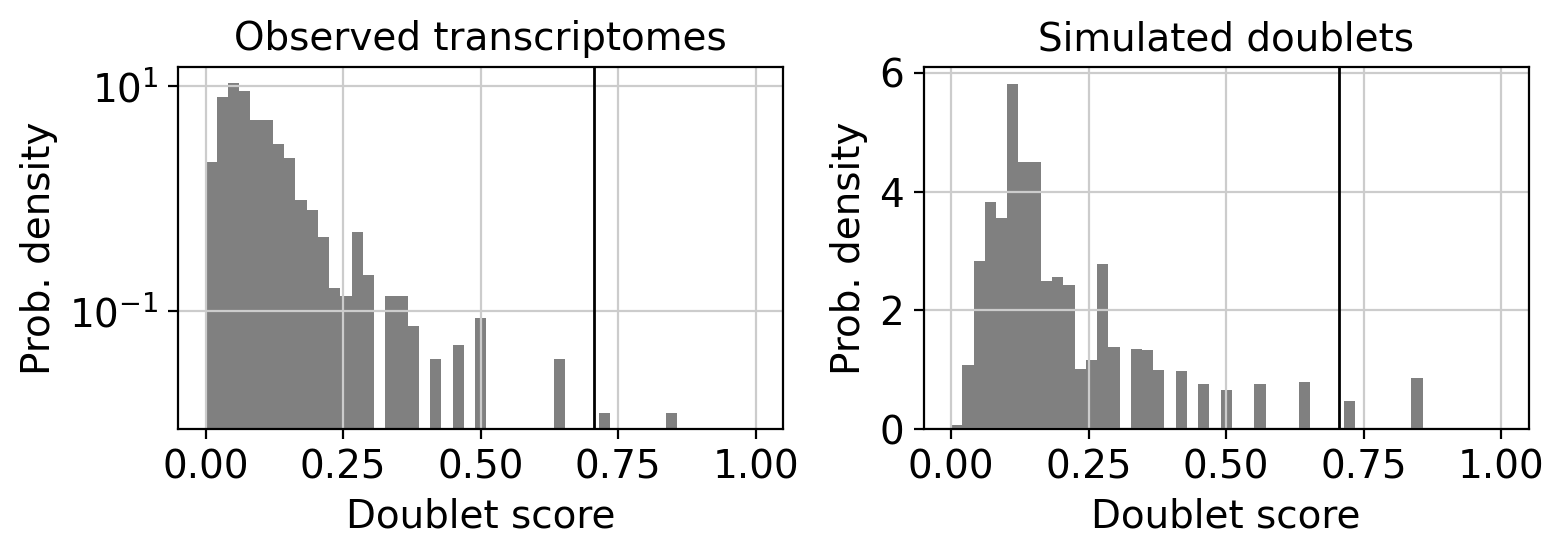

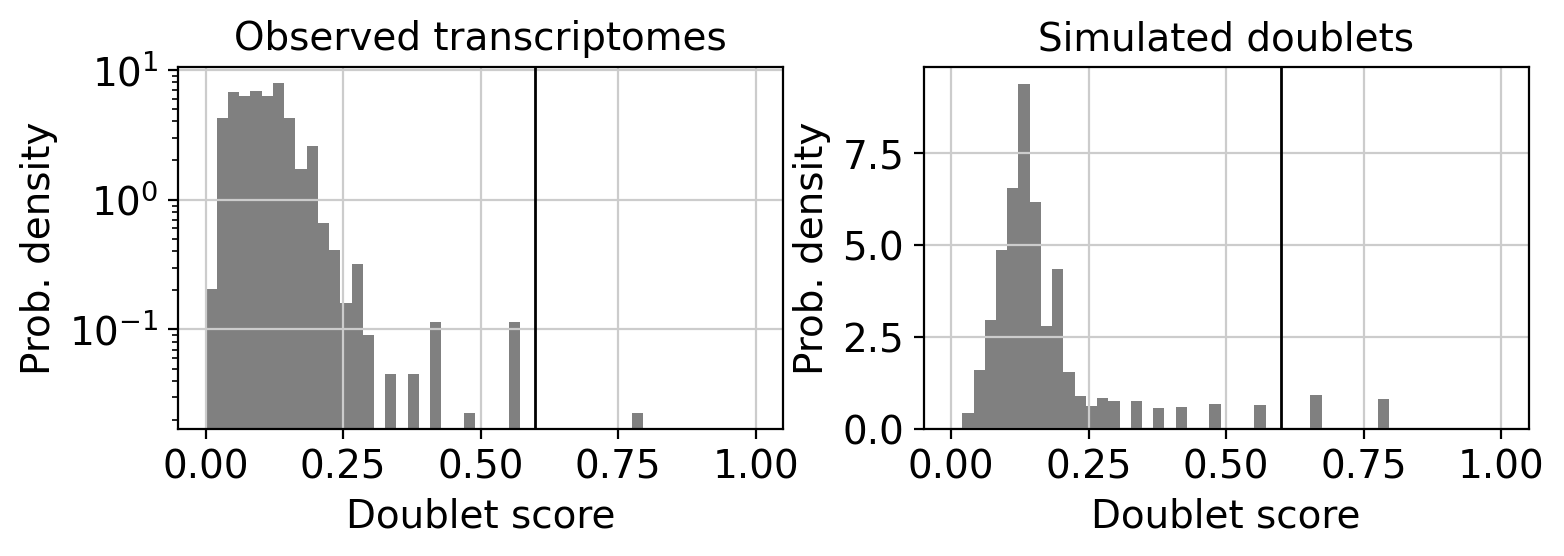

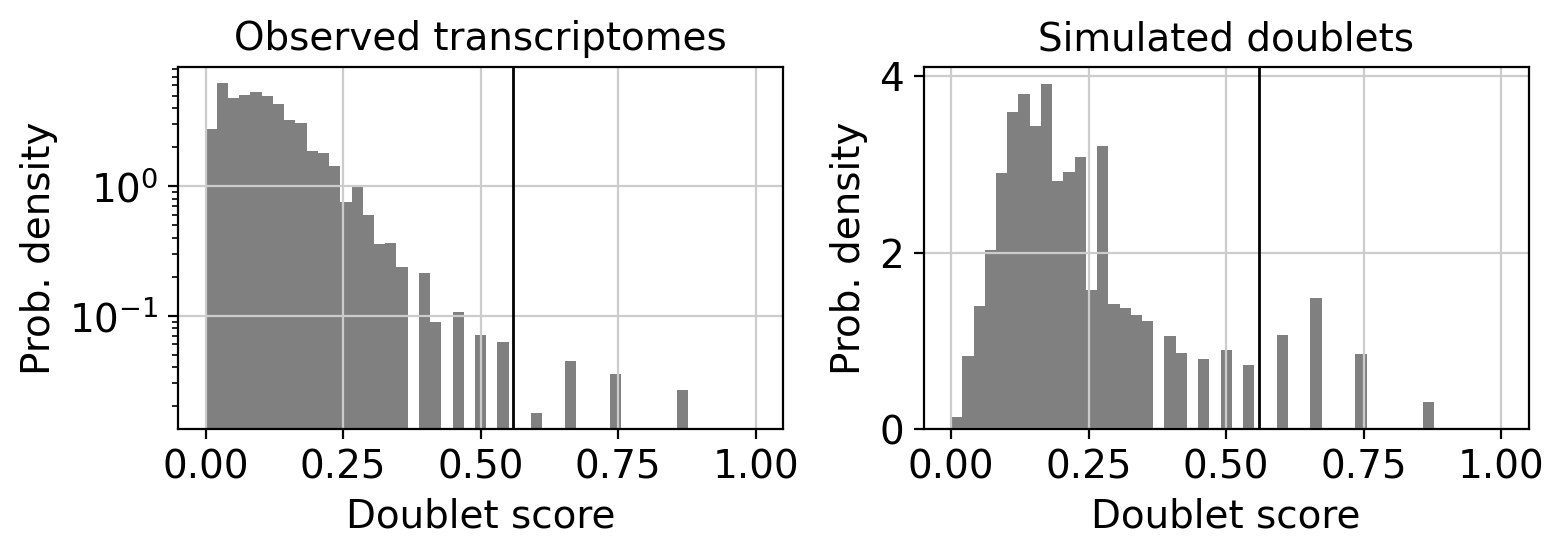

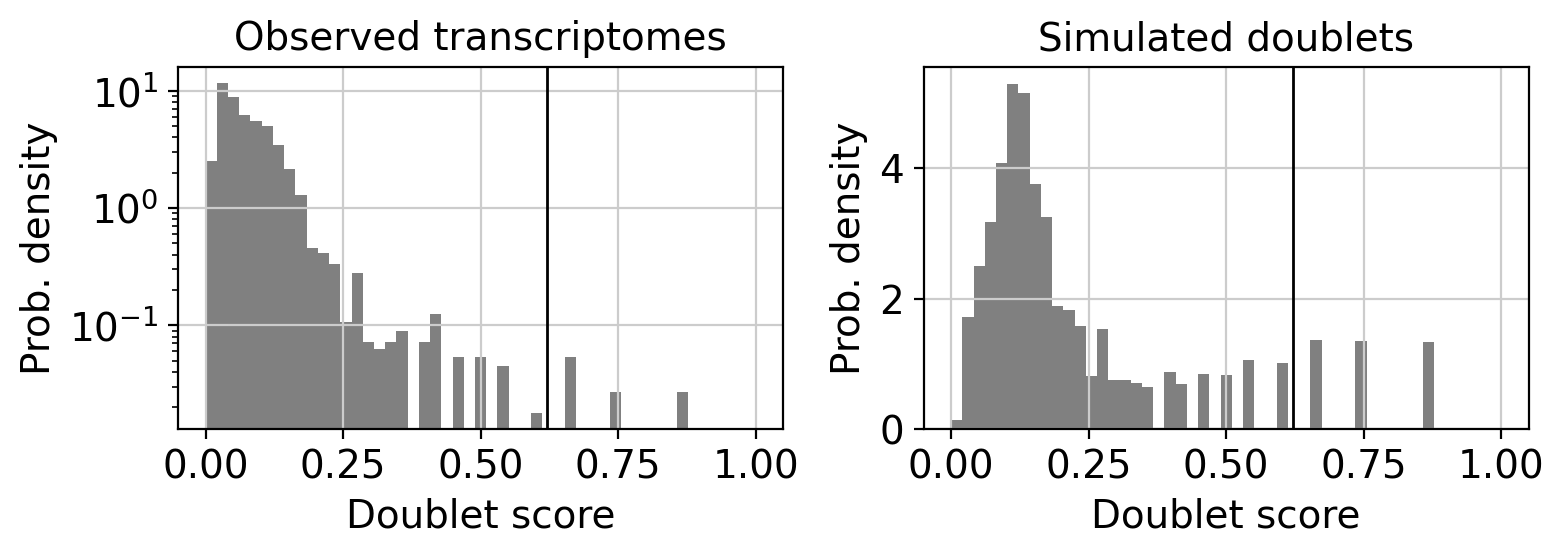

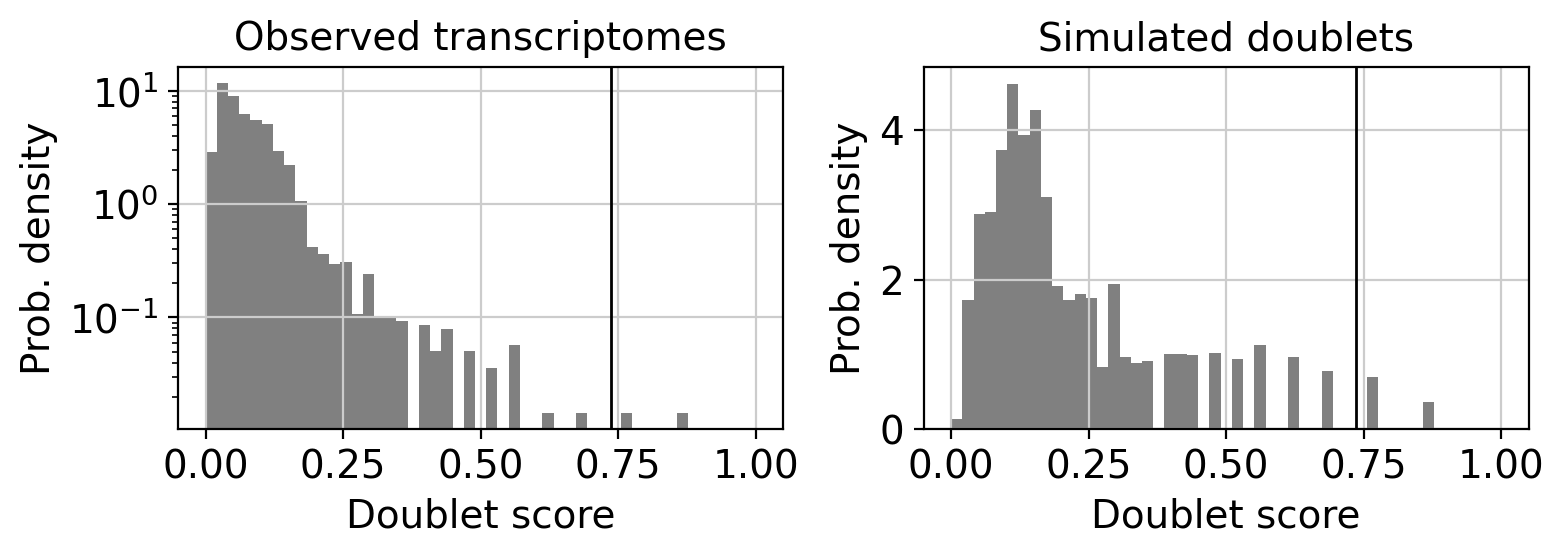

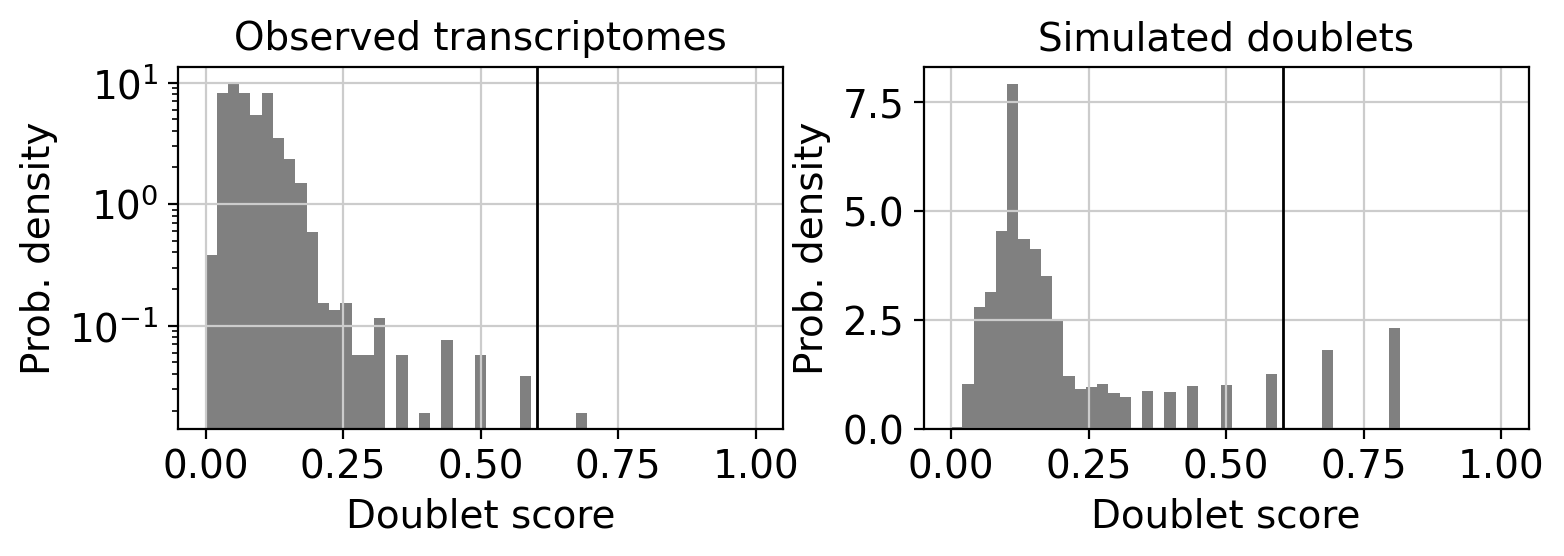

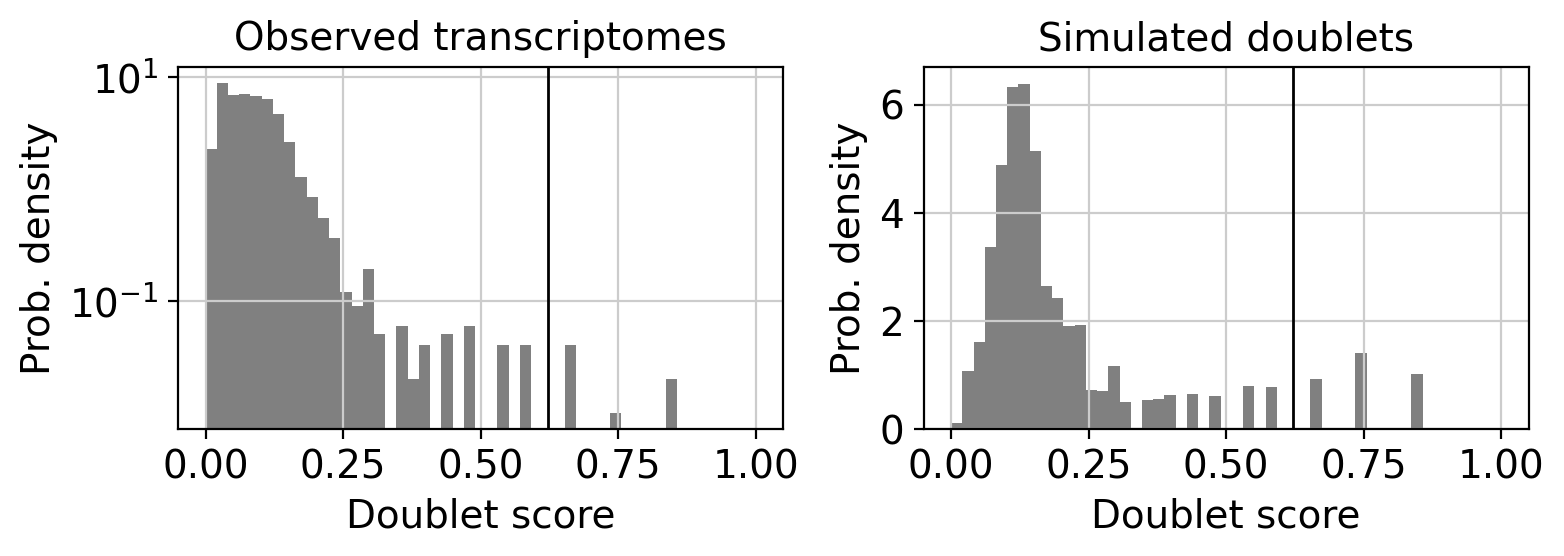

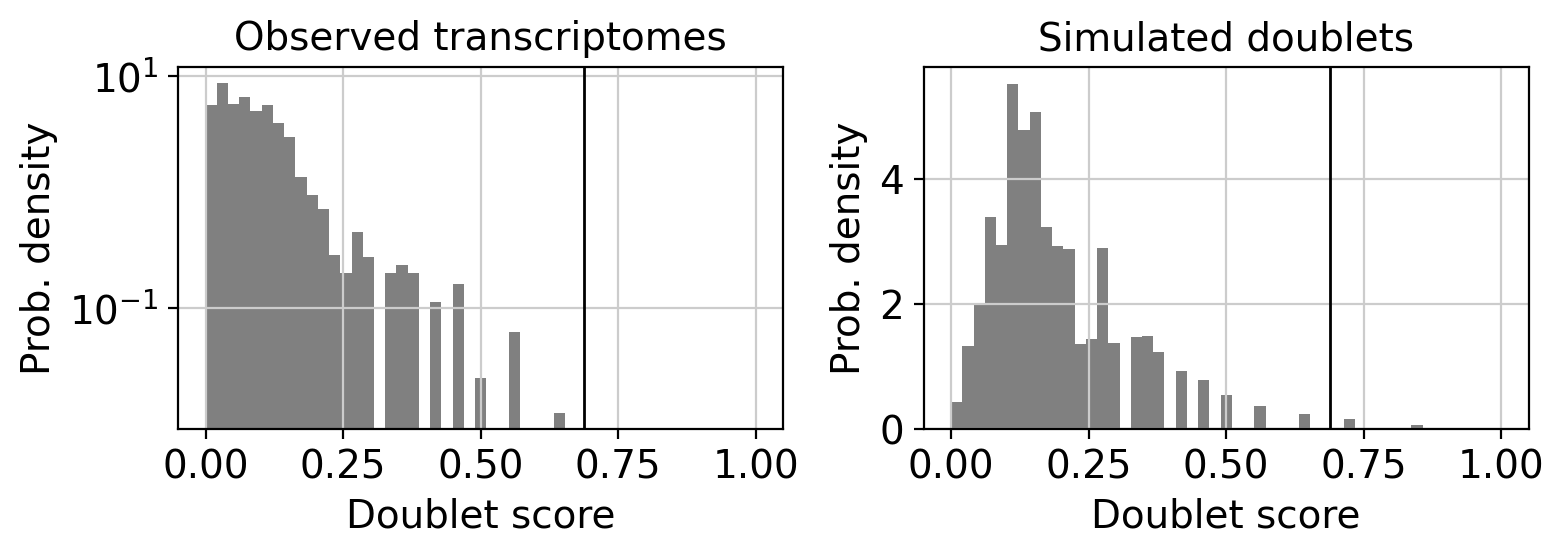

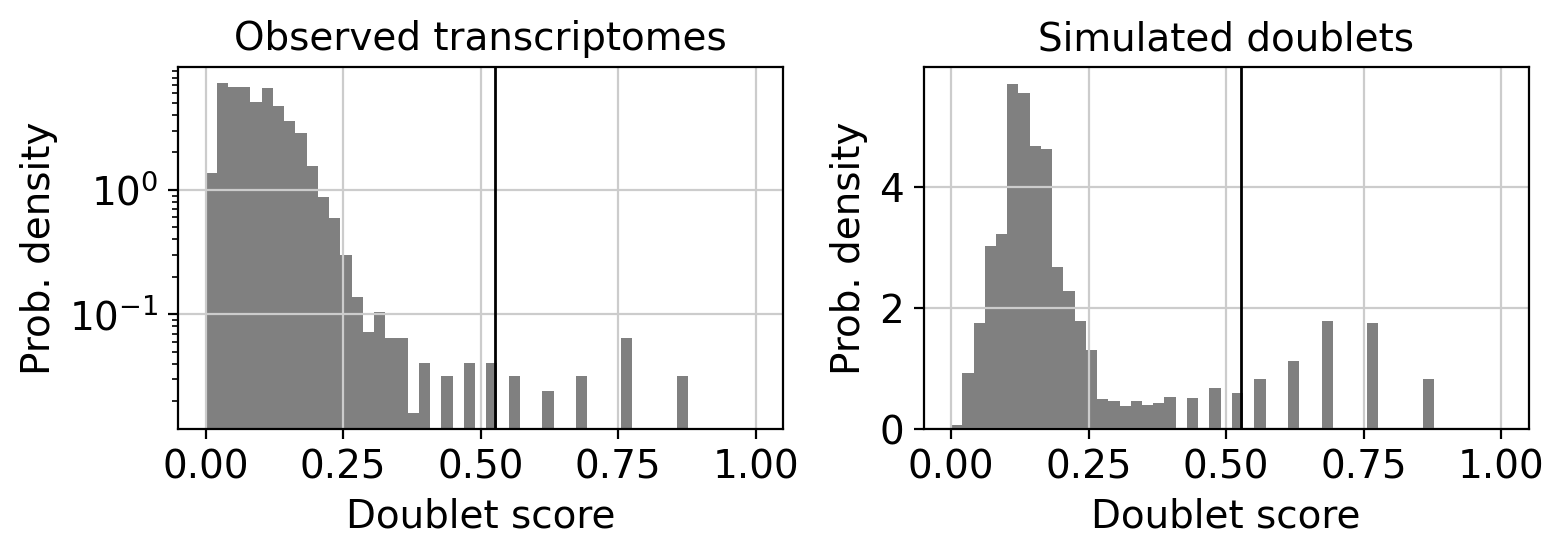

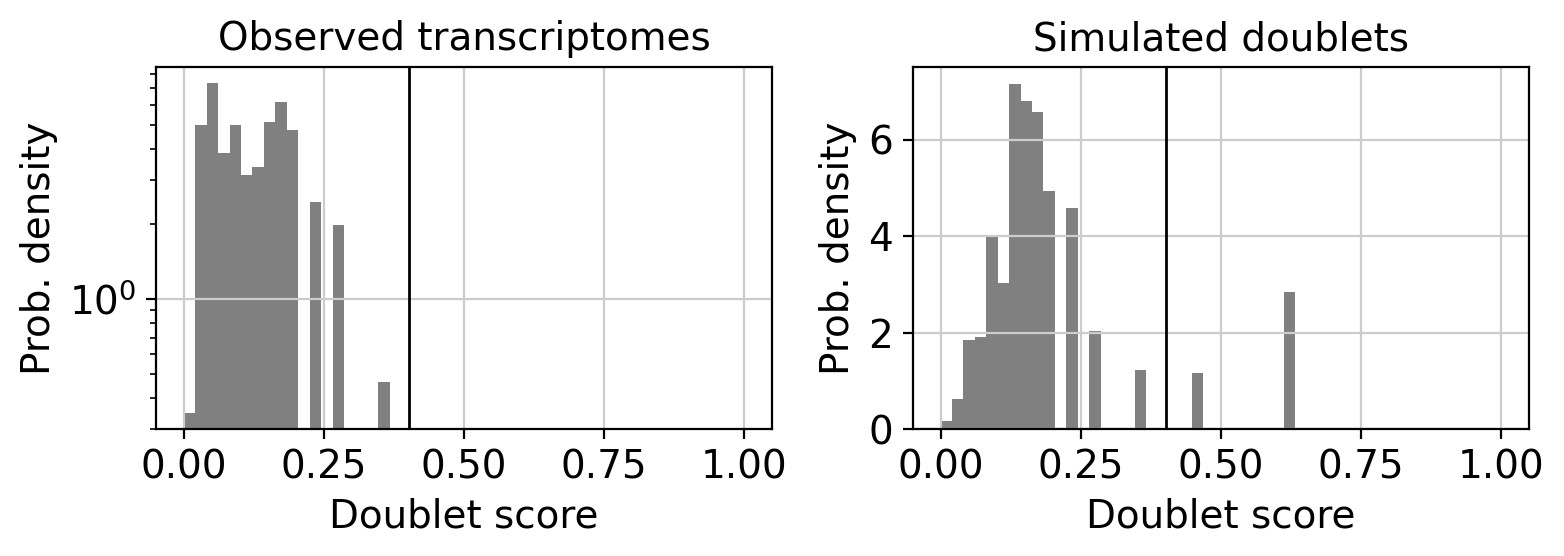

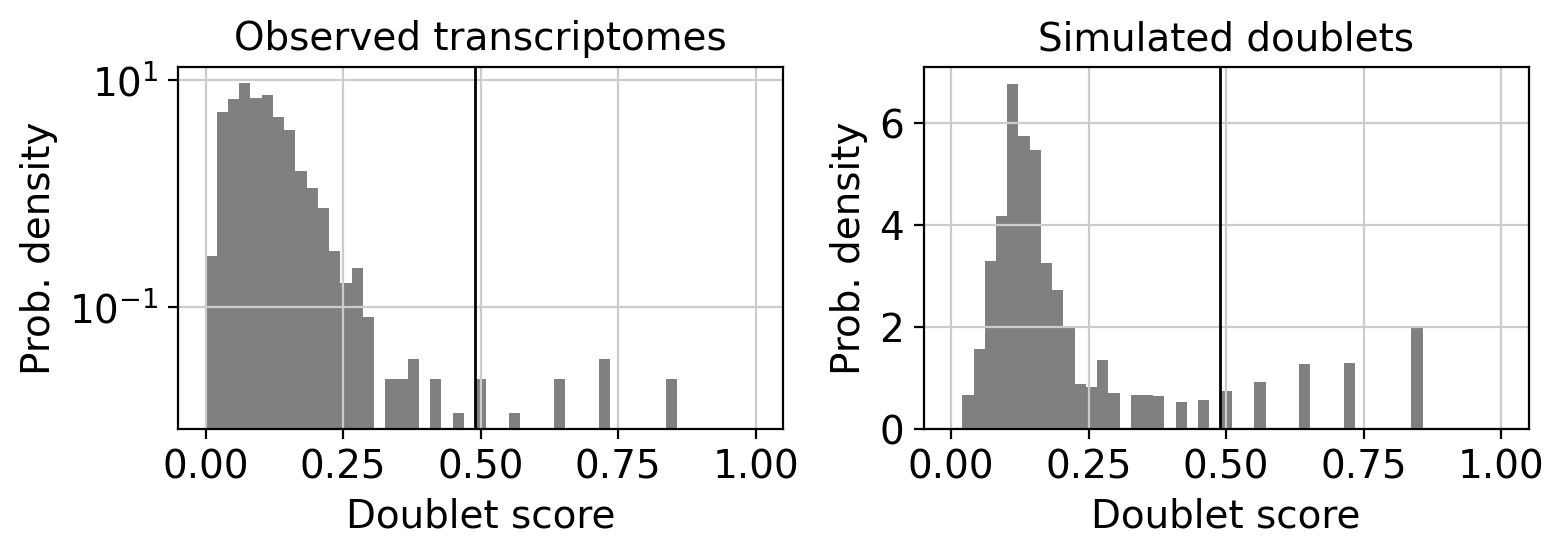

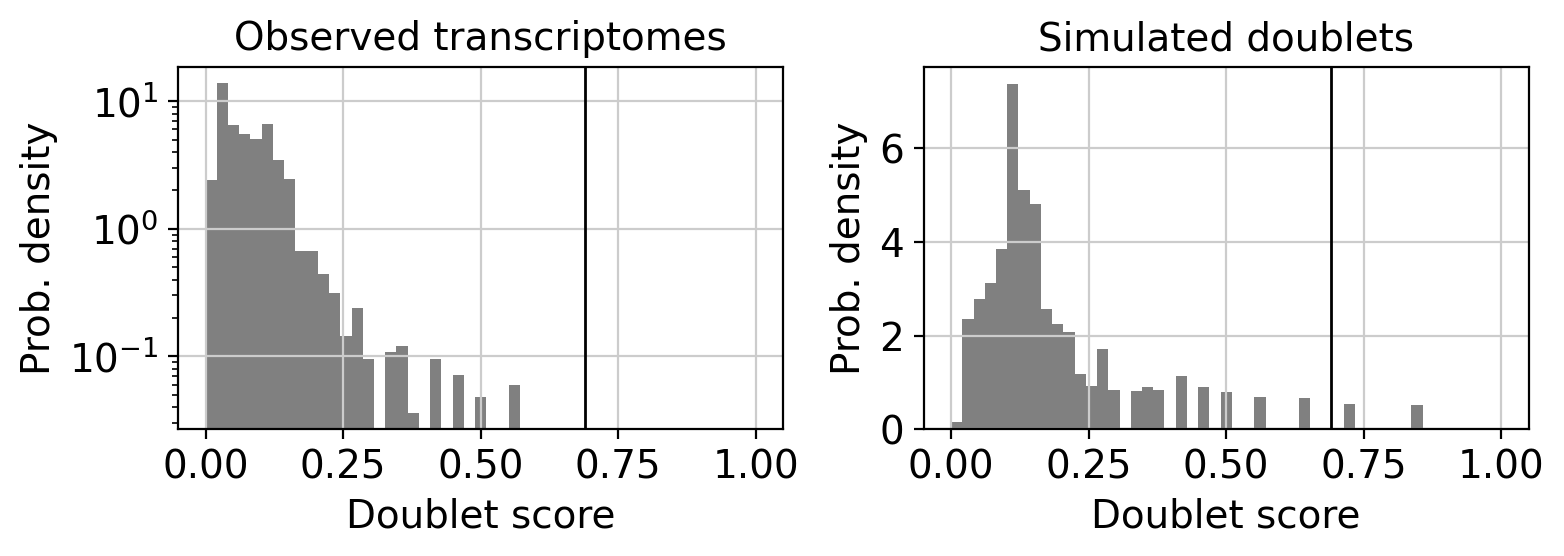

In [13]:
scrublet_concat = run_scrublet(
    adata, sample_col="Patient", cellbarcode_index_name="cellID"
)

In [14]:
scrublet_concat

Sample  doublet_score  \
cellID                                                                      
C119_T_0_2_0_c1_v2_id-AAACCTGCACAAGTAA  C119_T_0_2_0_c1_v2       0.235849   
C119_T_0_2_0_c1_v2_id-AAACCTGCACATCTTT  C119_T_0_2_0_c1_v2       0.097744   
C119_T_0_2_0_c1_v2_id-AAACCTGGTGATAAAC  C119_T_0_2_0_c1_v2       0.151515   
C119_T_0_2_0_c1_v2_id-AAACGGGAGGCGATAC  C119_T_0_2_0_c1_v2       0.129909   
C119_T_0_2_0_c1_v2_id-AAACGGGGTAAATGTG  C119_T_0_2_0_c1_v2       0.097744   
...                                                    ...            ...   
C155_T_0_0_0_c1_v3_id-TTTGGTTTCGCTCCTA  C155_T_0_0_0_c1_v3       0.020690   
C155_T_0_0_0_c1_v3_id-TTTGGTTTCTAGTGTG  C155_T_0_0_0_c1_v3       0.020690   
C155_T_0_0_0_c1_v3_id-TTTGTTGAGATAACGT  C155_T_0_0_0_c1_v3       0.054705   
C155_T_0_0_0_c1_v3_id-TTTGTTGAGGTTTGAA  C155_T_0_0_0_c1_v3       0.014925   
C155_T_0_0_0_c1_v3_id-TTTGTTGCAGCTGGTC  C155_T_0_0_0_c1_v3       0.169231   

                                        predicted_doublet  
cellID                                                     
C119_T_0_2_0_c1_v2_id-AAACCTGCACAAGTAA              False  
C119_T_0_2_0_c1_v2_id-AAACCTGCACATCTTT              False  
C119_T_0_2_0_c1_v2_id-AAACCTGGTGATAAAC              False  
C119_T_0_2_0_c1_v2_id-AAACGGGAGGCGATAC              False  
C119_T_0_2_0_c1_v2_id-AAACGGGGTAAATGTG              False  
...                                                   ...  
C155_T_0_0_0_c1_v3_id-TTTGGTTTCGCTCCTA              False  
C155_T_0_0_0_c1_v3_id-TTTGGTTTCTAGTGTG              False  
C155_T_0_0_0_c1_v3_id-TTTGTTGAGATAACGT              False  
C155_T_0_0_0_c1_v3_id-TTTGTTGAGGTTTGAA              False  
C155_T_0_0_0_c1_v3_id-TTTGTTGCAGCTGGTC              False  

[257251 rows x 3 columns]

In [15]:
print(
    "Number of predicted doublets: ",
    scrublet_concat[scrublet_concat["predicted_doublet"] == True].shape[0],
)

Number of predicted doublets:  722


In [16]:
scrublet_concat.to_csv(
    DIR2SAVE.joinpath(scrublet_filename), sep="\t", index=True, header=True
)

In [17]:
## add scores to adata.obs
# add annot to .obs
adata.obs = adata.obs.merge(
    right=scrublet_concat[["doublet_score", "predicted_doublet"]],
    how="left",
    right_index=True,
    left_index=True,
)

### Quality control

Data quality control can be split into cell QC and gene QC. Typical quality measures for assessing the quality of a cell include the number of molecule counts (UMIs), the number of expressed genes, and the fraction of counts that are mitochondrial. A high fraction of mitochondrial reads being picked up can indicate cell stress, as there is a low proportion of nuclear mRNA in the cell. It should be noted that high mitochondrial RNA fractions can also be biological signals indicating elevated respiration.

In [18]:
# find genes that are mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# find genes that are ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))

# compute QC metrics
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo"], inplace=True, log1p=False, percent_top=None
)

In [19]:
print(
    adata.obs[
        ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]
    ].describe()
)

print(adata.var[["n_cells_by_counts", "total_counts"]].describe())

       n_genes_by_counts   total_counts  pct_counts_mt  pct_counts_ribo
count      257251.000000  257251.000000  257251.000000    257251.000000
mean         2312.179922   14890.896484      13.939323        23.134806
std          2019.600569   24557.148438      11.885653        12.606252
min           200.000000     501.000000       0.000000         0.136054
25%           797.000000    2153.000000       4.811817        13.573321
50%          1515.000000    5378.000000      10.021413        22.020521
75%          3335.000000   17352.500000      19.726684        31.216819
max         11683.000000  583596.000000      49.991081        86.590645
       n_cells_by_counts  total_counts
count       43113.000000  4.311300e+04
mean        13796.548535  8.885140e+04
std         30115.913237  1.354919e+06
min             0.000000  0.000000e+00
25%             2.000000  2.000000e+00
50%           168.000000  1.790000e+02
75%         12136.000000  1.698600e+04
max        254778.000000  1.021350e+08


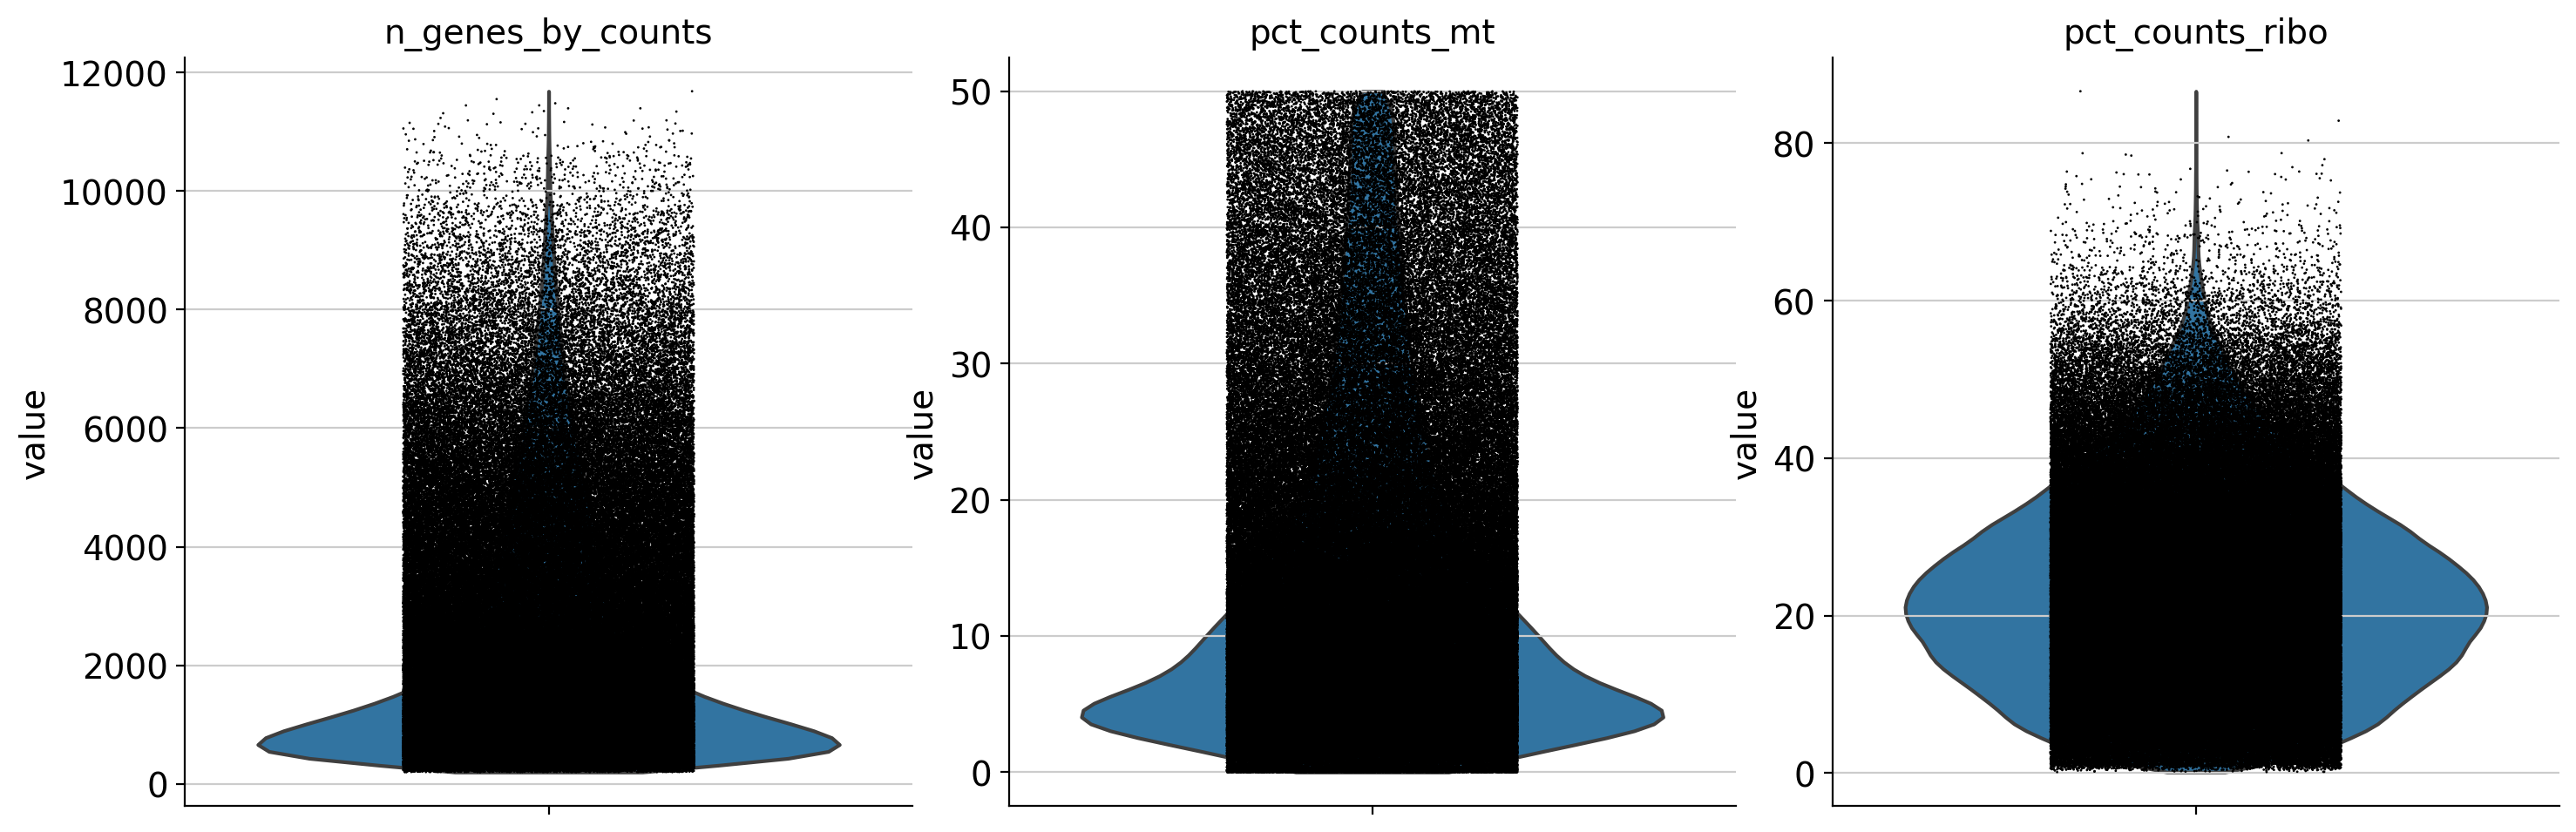

In [20]:
# violin plot of some distributions
sc.pl.violin(
    adata,
    keys=["n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.2,
    multi_panel=True,
    rotation=30,
    save="Pelka2021_CRC_QC_covariates.pdf",
    show=True,
)

#### Filter cells according to identified QC thresholds:

* set threshold MT percent to 10%
* remove ribosomal and mitochondrial genes 
* remove cells with less than 300 genes

In [21]:
#### Filter cells according to identified QC thresholds:
print("Total number of cells: {:d}".format(adata.n_obs))

# remove cells with more than 20% MT genes
adata = adata[adata.obs.pct_counts_mt < 20, :].copy()
print("Number of cells after mt filter: {:d}".format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes=300)
print("Number of cells after gene filter: {:d}".format(adata.n_obs))

Total number of cells: 257251
Number of cells after mt filter: 194066
Number of cells after gene filter: 190947


#### Remove mt and ribo genes

In [22]:
print(adata.shape[1])
adata = adata[:, ~adata.var["mt"].values]
print("After mt genes removal: ", adata.shape[1])
adata = adata[:, ~adata.var["ribo"].values]
print("After ribo genes removal: ", adata.shape[1])

43113
After mt genes removal:  43076
After ribo genes removal:  42974


### Save to file 

In [23]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/20mt/scrublet_qc')

In [24]:
adata.write(DIR2SAVE.joinpath("Pelka2021_CRC_raw_scrublet_qc.h5ad"))

In [3]:
adata = sc.read_h5ad(DIR2SAVE.joinpath("Pelka2021_CRC_raw_scrublet_qc.h5ad"))

In [4]:
adata

AnnData object with n_obs × n_vars = 190947 × 42974
    obs: 'SPECIMEN_TYPE', 'SOURCE_HOSPITAL', 'TISSUE_PROCESSING_TEAM', 'PROCESSING_TYPE', 'SINGLECELL_TYPE', 'Patient', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'Sample', 'Cell_type', 'clMidwayPr', 'cl295v11SubShort', 'Cell_subtype', 'Tissue', 'Therapy', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [5]:
set(adata.obs.SPECIMEN_TYPE)

{'T'}

In [14]:
adata.obs[["MMRStatus", "Patient"]].drop_duplicates().groupby("MMRStatus").size()

MMRStatus
MMRd    35
MMRp    29
dtype: int64